<a href="https://www.kaggle.com/code/mesutssmn/asteroid-hazardous-prediction?scriptVersionId=249122261" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius: 40px; border: #5E5772 solid; padding: 12px; background-color: #699; font-size: 150%; text-align: left;">

<h3 align="center"><font color='#300000'>ASTEROID HAZARDOUS PREDICTION</font></h3>

<h4 align="left"><font color='#30000' size=5%>To Do :</font></h4>
    
<li> Cleaning dataset for classification</li>
    
<li> Some analysis and statistics</li>
    
<li> ML, ANN
    
    

<h3 align="left"><font color='#300000' size=5%>ABOUT DATA:</font></h3>

An asteroid is a minor planet—an object that is neither a true planet nor a comet—that orbits within the inner Solar System. They are rocky, metallic, or icy bodies with no atmosphere. The size and shape of asteroids vary significantly, ranging from small rubble piles under a kilometer across to Ceres, a dwarf planet almost 1000 km in diameter.
        
<div style="border-radius: 10px; overflow: hidden; text-align: left;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/e/ef/42_of_the_largest_objects_in_the_asteroid_belt.jpg" alt="Asteroids" width="900">
</div>
    
    
You can find more information about Asteroids [here](https://en.wikipedia.org/wiki/Asteroid).
    
    

<div style="border-radius: 10px; overflow: hidden; text-align: center;">
    <img src="https://storage.evrimagaci.org/old/content_media/0ee5cf4f5e35ec36dba84c03c34d9c8a.jpg" alt="Asteroids" width="900"></div>

<div style="border-radius: 10px; overflow: hidden; text-align: left;">
    <img src="https://i0.wp.com/www.kozmikanafor.com/wp-content/uploads/2018/01/asteroit-carpma-67329.jpg?fit=1200%2C733&ssl=1" alt="Asteroid Collision" width="900"></div>
</div>

   ##### Thank you for taking the time to read. Please don't ignore voting.


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #699; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LINKS </div>

#### **Name :** Mesut Suhan Şişman

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Mesutssmn"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/mesut-suhan-sisman/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
    </table>

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #699; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> IMPORTINGS </div>

In [1]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score, make_scorer, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate,GridSearchCV, KFold
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# İgnore Warnings
import warnings
warnings.filterwarnings("ignore")

2025-07-06 20:21:33.564256: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-06 20:21:33.564378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-06 20:21:33.879860: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #699; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> FEATURES </div>

In [3]:
df_ = pd.read_csv("/kaggle/input/asteroid-dataset/dataset.csv")

In [4]:
df = df_.copy()
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,0.090,0.200,JPL 47,2458600.500,58600,20190427.000,J2000,0.076,2.769,2.559,10.594,80.306,73.598,77.372,2.980,0.214,2458238.754,20180430.254,1683.146,4.608,1.595,620.641,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.433
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,0.101,18.000,JPL 37,2459000.500,59000,20200531.000,J2000,0.230,2.774,2.136,34.833,173.025,310.202,144.976,3.412,0.213,2458320.962,20180721.462,1687.411,4.620,1.234,480.349,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.359
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,0.214,10.594,JPL 112,2459000.500,59000,20200531.000,J2000,0.257,2.668,1.983,12.991,169.851,248.066,125.435,3.354,0.226,2458445.792,20181123.292,1592.014,4.359,1.034,402.515,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.338
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,0.423,0.200,JPL 35,2458600.500,58600,20190427.000,J2000,0.089,2.361,2.152,7.142,103.811,150.729,95.862,2.571,0.272,2458247.560,20180509.060,1325.433,3.629,1.139,443.451,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.400
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,0.274,3.140,JPL 114,2459000.500,59000,20200531.000,J2000,0.191,2.574,2.083,5.367,141.571,358.648,17.846,3.065,0.239,2458925.723,20200317.223,1508.414,4.130,1.096,426.433,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.522


**id, spkid, full_name:** Identifiers and names of the asteroids.

**pdes, name, prefix:** Additional identifiers.

**neo, pha:** Flags for Near-Earth Object (NEO) and Potentially Hazardous Asteroid (PHA).

**H:** Absolute magnitude.

**diameter, diameter_sigma:** Diameter of the asteroid and its uncertainty.

**albedo:** Reflectivity.

**orbit_id, epoch, epoch_mjd, epoch_cal, equinox:** Orbital parameters and their reference times.

**e, a, q, i, om, w, ma, ad, n, tp, tp_cal:** Orbital elements like eccentricity, semi-major axis, perihelion distance, inclination, longitude of ascending node, argument of perihelion, mean anomaly, aphelion distance, mean motion, time of perihelion passage, and its calendar date.

**per, per_y:** Orbital period in days and years.

**moid, moid_ld:** Minimum Orbit Intersection Distance with Earth, in astronomical units and lunar distances.

**sigma_e, sigma_a, sigma_q, sigma_i, sigma_om, sigma_w, sigma_ma, sigma_ad, sigma_n, sigma_tp, sigma_per:** Uncertainties in the orbital elements.

**class:** Classification of the asteroid.

**rms:** Root mean square of the orbital fit.

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #699; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> EDA </div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [6]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [7]:
df.equinox.unique()

array(['J2000'], dtype=object)

In [8]:
df.pha.unique()

array(['N', 'Y', nan], dtype=object)

In [9]:
df.neo.unique() 

array(['N', 'Y', nan], dtype=object)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spkid,958524.000,3810113.989,6831540.880,2000001.000,2239631.750,2479262.500,3752517.750,54017232.000
H,952261.000,16.906,1.790,-1.100,16.100,16.900,17.714,33.200
diameter,136209.000,5.506,9.425,0.003,2.780,3.972,5.765,939.400
albedo,135103.000,0.131,0.110,0.001,0.053,0.079,0.190,1.000
diameter_sigma,136081.000,0.479,0.783,0.001,0.180,0.332,0.620,140.000
epoch,958524.000,2458869.282,701.672,2425051.500,2459000.500,2459000.500,2459000.500,2459000.500
epoch_mjd,958524.000,58868.782,701.672,25051.000,59000.000,59000.000,59000.000,59000.000
epoch_cal,958524.000,20196925.052,19303.537,19270620.000,20200531.000,20200531.000,20200531.000,20200531.000
e,958524.000,0.156,0.093,0.000,0.092,0.145,0.201,1.855
a,958524.000,2.902,39.720,-14702.448,2.388,2.647,3.002,33488.896


In [11]:
df.drop(columns=['id', 'spkid', 'pdes', 'full_name', 'name', 'neo', 'prefix', 'equinox', 'orbit_id'], inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
H,952261.000,16.906,1.790,-1.100,16.100,16.900,17.714,33.200
diameter,136209.000,5.506,9.425,0.003,2.780,3.972,5.765,939.400
albedo,135103.000,0.131,0.110,0.001,0.053,0.079,0.190,1.000
diameter_sigma,136081.000,0.479,0.783,0.001,0.180,0.332,0.620,140.000
epoch,958524.000,2458869.282,701.672,2425051.500,2459000.500,2459000.500,2459000.500,2459000.500
epoch_mjd,958524.000,58868.782,701.672,25051.000,59000.000,59000.000,59000.000,59000.000
epoch_cal,958524.000,20196925.052,19303.537,19270620.000,20200531.000,20200531.000,20200531.000,20200531.000
e,958524.000,0.156,0.093,0.000,0.092,0.145,0.201,1.855
a,958524.000,2.902,39.720,-14702.448,2.388,2.647,3.002,33488.896
q,958524.000,2.395,2.139,0.071,1.971,2.226,2.578,80.399


In [12]:
"""removableData = ['diameter', 'H', 'albedo', 'diameter_sigma', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'pha', 'neo']

df = df.dropna(subset=removableData)

df.head()"""

"removableData = ['diameter', 'H', 'albedo', 'diameter_sigma', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'pha', 'neo']\n\ndf = df.dropna(subset=removableData)\n\ndf.head()"

In [13]:
df.head()

,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,N,3.400,939.400,0.090,0.200,2458600.500,58600,20190427.000,0.076,2.769,2.559,10.594,80.306,73.598,77.372,2.980,0.214,2458238.754,20180430.254,1683.146,4.608,1.595,620.641,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.433
1,N,4.200,545.000,0.101,18.000,2459000.500,59000,20200531.000,0.230,2.774,2.136,34.833,173.025,310.202,144.976,3.412,0.213,2458320.962,20180721.462,1687.411,4.620,1.234,480.349,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.359
2,N,5.330,246.596,0.214,10.594,2459000.500,59000,20200531.000,0.257,2.668,1.983,12.991,169.851,248.066,125.435,3.354,0.226,2458445.792,20181123.292,1592.014,4.359,1.034,402.515,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.338
3,N,3.000,525.400,0.423,0.200,2458600.500,58600,20190427.000,0.089,2.361,2.152,7.142,103.811,150.729,95.862,2.571,0.272,2458247.560,20180509.060,1325.433,3.629,1.139,443.451,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.400
4,N,6.900,106.699,0.274,3.140,2459000.500,59000,20200531.000,0.191,2.574,2.083,5.367,141.571,358.648,17.846,3.065,0.239,2458925.723,20200317.223,1508.414,4.130,1.096,426.433,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.522


In [14]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

                n_miss  ratio
albedo          823421 85.910
diameter_sigma  822443 85.800
diameter        822315 85.790
sigma_ad         19926  2.080
sigma_per        19926  2.080
sigma_q          19922  2.080
sigma_i          19922  2.080
sigma_ma         19922  2.080
sigma_n          19922  2.080
sigma_tp         19922  2.080
sigma_e          19922  2.080
sigma_om         19922  2.080
sigma_w          19922  2.080
sigma_a          19922  2.080
pha              19921  2.080
moid             19921  2.080
H                 6263  0.650
moid_ld            127  0.010
ad                   4  0.000
per                  4  0.000
rms                  2  0.000
ma                   1  0.000
per_y                1  0.000


In [15]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [16]:
for col in df.select_dtypes(include = ["int64", "float64"]):
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

H True
diameter True
albedo True
diameter_sigma True
epoch True
epoch_mjd True
epoch_cal True
e True
a True
q True
i True
om False
w False
ma False
ad True
n True
tp True
tp_cal True
per True
per_y True
moid True
moid_ld True
sigma_e True
sigma_a True
sigma_q True
sigma_i True
sigma_om True
sigma_w True
sigma_ma True
sigma_ad True
sigma_n True
sigma_tp True
sigma_per True
rms True


In [17]:
for col in df.select_dtypes(include = ["int64", "float64"]):
    print(col, check_outlier(df, col))

H False
diameter False
albedo False
diameter_sigma False
epoch False
epoch_mjd False
epoch_cal False
e False
a False
q False
i False
om False
w False
ma False
ad False
n False
tp False
tp_cal False
per False
per_y False
moid False
moid_ld False
sigma_e False
sigma_a False
sigma_q False
sigma_i False
sigma_om False
sigma_w False
sigma_ma False
sigma_ad False
sigma_n False
sigma_tp False
sigma_per False
rms False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pha             938603 non-null  object 
 1   H               952261 non-null  float64
 2   diameter        136209 non-null  float64
 3   albedo          135103 non-null  float64
 4   diameter_sigma  136081 non-null  float64
 5   epoch           958524 non-null  float64
 6   epoch_mjd       958524 non-null  float64
 7   epoch_cal       958524 non-null  float64
 8   e               958524 non-null  float64
 9   a               958524 non-null  float64
 10  q               958524 non-null  float64
 11  i               958524 non-null  float64
 12  om              958524 non-null  float64
 13  w               958524 non-null  float64
 14  ma              958523 non-null  float64
 15  ad              958520 non-null  float64
 16  n               958524 non-null  float64
 17  tp        

In [19]:
"""# replacing values
data['neo'].replace(['N', 'Y ', 'Y'],
                        [0, 1, 1], inplace=True)
data['neo'] = data['neo'].astype(int)

# replacing values
data['pha'].replace(['N', 'Y ', 'Y'],
                        [0, 1, 1], inplace=True)
data['pha'] = data['neo'].astype(int)

dummies = pd.get_dummies(data['class'])
 
# Concatenate the dummies to original dataframe
data = pd.concat([data, dummies], axis='columns')
 
# drop the values
data = data.drop(['class'], axis='columns')

data.head()"""

"# replacing values\ndata['neo'].replace(['N', 'Y ', 'Y'],\n                        [0, 1, 1], inplace=True)\ndata['neo'] = data['neo'].astype(int)\n\n# replacing values\ndata['pha'].replace(['N', 'Y ', 'Y'],\n                        [0, 1, 1], inplace=True)\ndata['pha'] = data['neo'].astype(int)\n\ndummies = pd.get_dummies(data['class'])\n \n# Concatenate the dummies to original dataframe\ndata = pd.concat([data, dummies], axis='columns')\n \n# drop the values\ndata = data.drop(['class'], axis='columns')\n\ndata.head()"

In [20]:
G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2
M = 1.989e30     # mass of the sun in kg
AU_to_m = 1.496e11  # 1 astronomical unit in meters

In [21]:
df['a_m'] = df['a'] * AU_to_m  # converting semi-major axis to meters
df['orbital_speed'] = np.sqrt(G * M / df['a_m'])

# Specific Orbital Energy
df['orbital_energy'] = -G * M / (2 * df['a_m'])

# Surface Area (assuming spherical shape)
df['surface_area'] = np.pi * (df['diameter'] ** 2)

# Volume (assuming spherical shape)
df['volume'] = (4/3) * np.pi * (df['diameter'] / 2) ** 3

# Assuming a constant density for all asteroids (example: 2.6 g/cm³ = 2600 kg/m³)
density = 2600  # in kg/m³
df['mass'] = density * df['volume']

# Drop the intermediate column for semi-major axis in meters
df.drop(columns=['a_m'], inplace=True)

In [22]:
def classify_asteroid(albedo):
    if 0.03 <= albedo <= 0.10:
        return 'C-type'
    elif 0.10 < albedo <= 0.22:
        return 'S-type'
    elif 0.10 <= albedo <= 0.18:
        return 'M-type'
    else:
        return 'Unknown'

# Apply the classification
df['asteroid_type'] = df['albedo'].apply(classify_asteroid)

In [23]:
df.head()

,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms,orbital_speed,orbital_energy,surface_area,volume,mass,asteroid_type
0,N,7.350,27.744,0.090,0.200,2458600.500,58600.000,20190427.000,0.076,2.769,2.559,10.594,80.306,73.598,77.372,2.980,0.214,2458238.754,20180430.254,1683.146,4.608,1.595,620.641,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.433,17901.113,-160224918.901,2418.159,11181.528,29071972.662,C-type
1,N,7.350,27.744,0.101,3.104,2459000.500,59000.000,20200531.000,0.230,2.774,2.136,34.833,173.025,310.202,144.976,3.412,0.213,2458320.962,20180721.462,1687.411,4.620,1.234,480.349,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.359,17886.017,-159954803.395,2418.159,11181.528,29071972.662,S-type
2,N,7.350,27.744,0.214,3.104,2459000.500,59000.000,20200531.000,0.257,2.668,1.983,12.991,169.851,248.066,125.435,3.354,0.226,2458445.792,20181123.292,1592.014,4.359,1.034,402.515,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.338,18236.367,-166282542.327,2418.159,11181.528,29071972.662,S-type
3,N,7.350,27.744,0.423,0.200,2458600.500,58600.000,20190427.000,0.089,2.361,2.152,7.142,103.811,150.729,95.862,2.571,0.272,2458247.560,20180509.060,1325.433,3.629,1.139,443.451,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.400,19385.099,-187891038.895,2418.159,11181.528,29071972.662,Unknown
4,N,7.350,27.744,0.274,3.104,2459000.500,59000.000,20200531.000,0.191,2.574,2.083,5.367,141.571,358.648,17.846,3.065,0.239,2458925.723,20200317.223,1508.414,4.130,1.096,426.433,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.522,18567.227,-172370953.890,2418.159,11181.528,29071972.662,Unknown


In [24]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 958524
Variables: 42
cat_cols: 3
num_cols: 39
cat_but_car: 0
num_but_cat: 0


In [25]:
cat_cols, num_cols, cat_but_car

(['pha', 'class', 'asteroid_type'],
 ['H',
  'diameter',
  'albedo',
  'diameter_sigma',
  'epoch',
  'epoch_mjd',
  'epoch_cal',
  'e',
  'a',
  'q',
  'i',
  'om',
  'w',
  'ma',
  'ad',
  'n',
  'tp',
  'tp_cal',
  'per',
  'per_y',
  'moid',
  'moid_ld',
  'sigma_e',
  'sigma_a',
  'sigma_q',
  'sigma_i',
  'sigma_om',
  'sigma_w',
  'sigma_ma',
  'sigma_ad',
  'sigma_n',
  'sigma_tp',
  'sigma_per',
  'rms',
  'orbital_speed',
  'orbital_energy',
  'surface_area',
  'volume',
  'mass'],
 [])

        pha  Ratio
pha               
N    936537 97.706
Y      2066  0.216


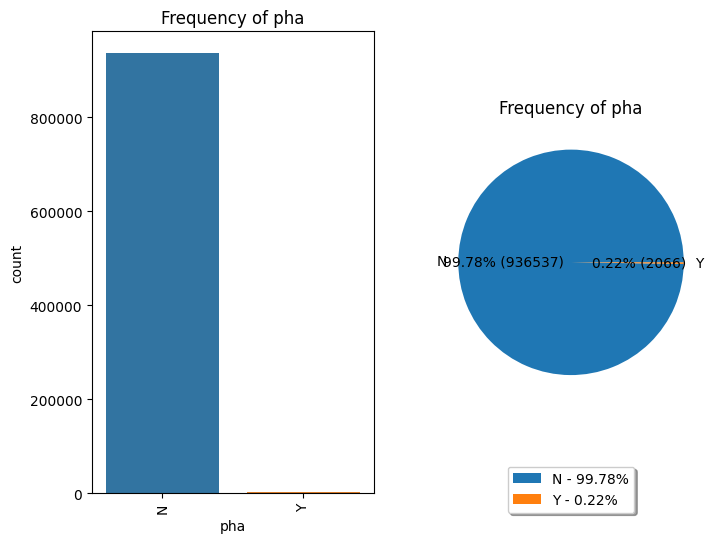

        class  Ratio
class               
MBA    855954 89.299
OMB     28355  2.958
IMB     20360  2.124
MCA     18685  1.949
APO     12687  1.324
AMO      8457  0.882
TJN      8221  0.858
TNO      3468  0.362
ATE      1729  0.180
CEN       506  0.053
AST        76  0.008
IEO        22  0.002
HYA         4  0.000


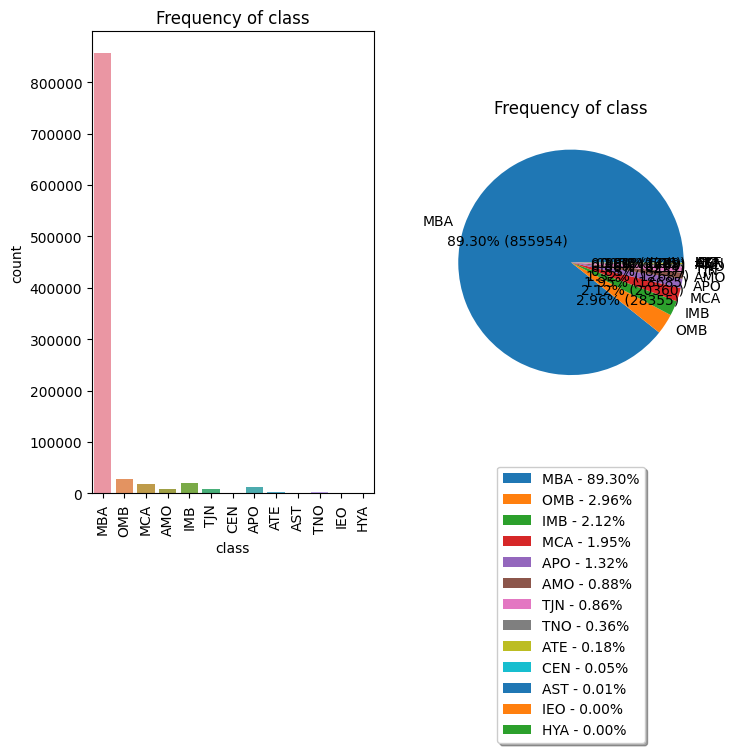

               asteroid_type  Ratio
asteroid_type                      
Unknown               854418 89.139
C-type                 76659  7.998
S-type                 27447  2.863


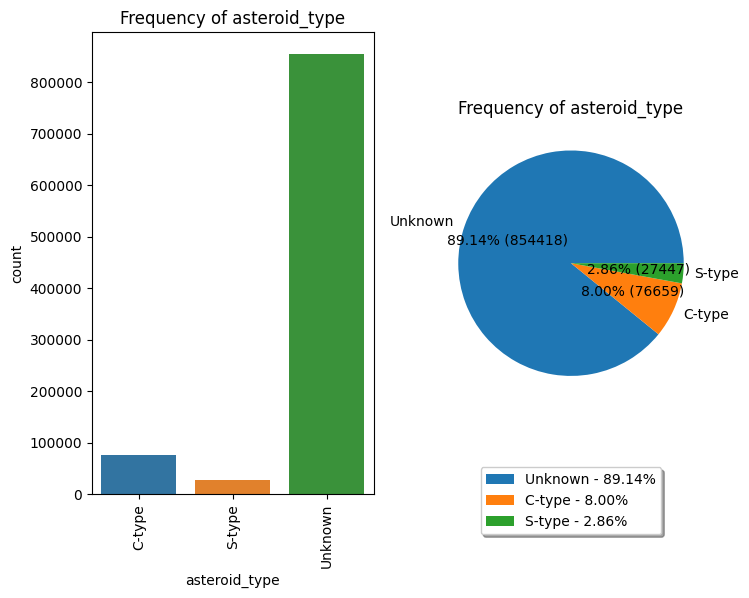

In [26]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

count   952261.000
mean        16.904
std          1.758
min          7.350
5%          14.400
10%         15.100
20%         15.800
30%         16.300
40%         16.600
50%         16.900
60%         17.200
70%         17.577
80%         18.000
90%         18.508
95%         19.100
99%         23.800
max         26.150
Name: H, dtype: float64


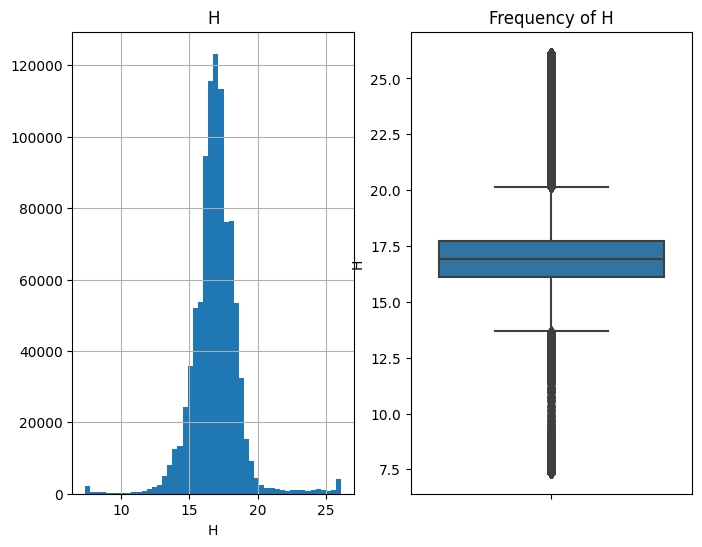

#####################################
count   136209.000
mean         5.063
std          4.113
min          0.003
5%           1.702
10%          2.029
20%          2.546
30%          3.011
40%          3.468
50%          3.972
60%          4.563
70%          5.290
80%          6.371
90%          8.643
95%         12.119
99%         27.744
max         27.744
Name: diameter, dtype: float64


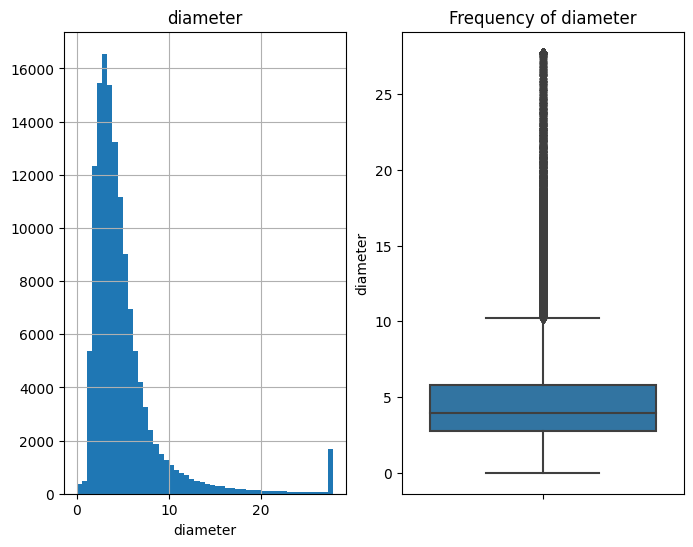

#####################################
count   135103.000
mean         0.131
std          0.110
min          0.001
5%           0.034
10%          0.040
20%          0.049
30%          0.057
40%          0.067
50%          0.079
60%          0.103
70%          0.158
80%          0.223
90%          0.296
95%          0.350
99%          0.467
max          0.824
Name: albedo, dtype: float64


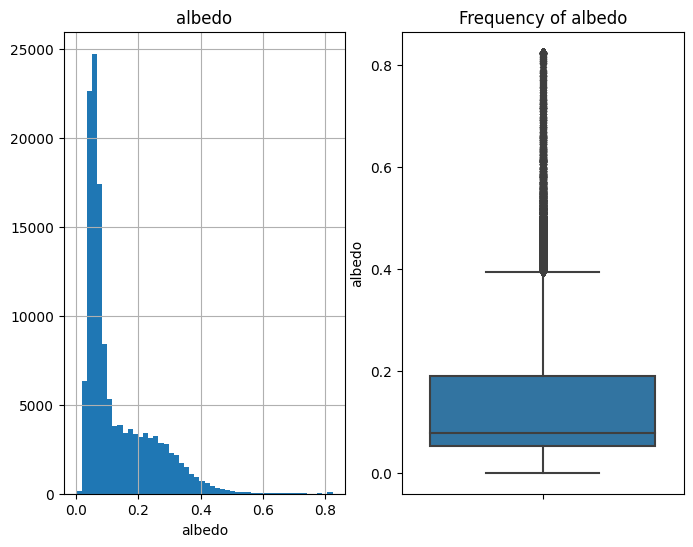

#####################################
count   136081.000
mean         0.469
std          0.431
min          0.001
5%           0.072
10%          0.104
20%          0.156
30%          0.206
40%          0.263
50%          0.332
60%          0.423
70%          0.544
80%          0.714
90%          0.996
95%          1.285
99%          2.128
max          3.104
Name: diameter_sigma, dtype: float64


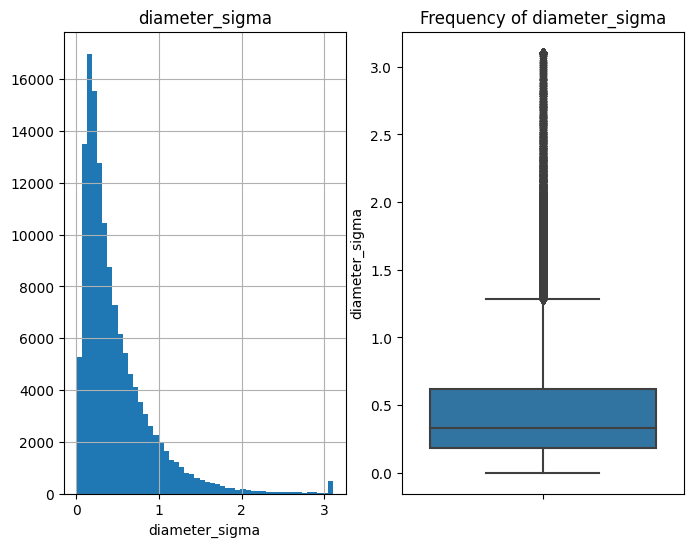

#####################################
count    958524.000
mean    2458968.583
std         140.625
min     2458313.000
5%      2458725.500
10%     2459000.500
20%     2459000.500
30%     2459000.500
40%     2459000.500
50%     2459000.500
60%     2459000.500
70%     2459000.500
80%     2459000.500
90%     2459000.500
95%     2459000.500
99%     2459000.500
max     2459000.500
Name: epoch, dtype: float64


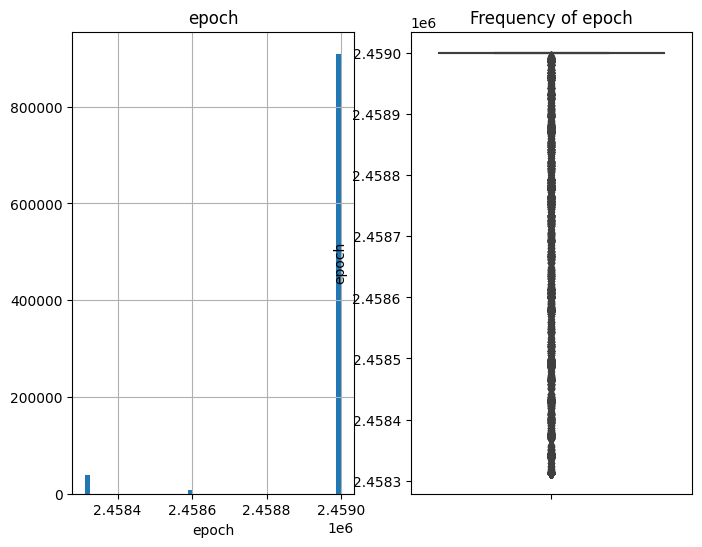

#####################################
count   958524.000
mean     58968.083
std        140.625
min      58312.500
5%       58725.000
10%      59000.000
20%      59000.000
30%      59000.000
40%      59000.000
50%      59000.000
60%      59000.000
70%      59000.000
80%      59000.000
90%      59000.000
95%      59000.000
99%      59000.000
max      59000.000
Name: epoch_mjd, dtype: float64


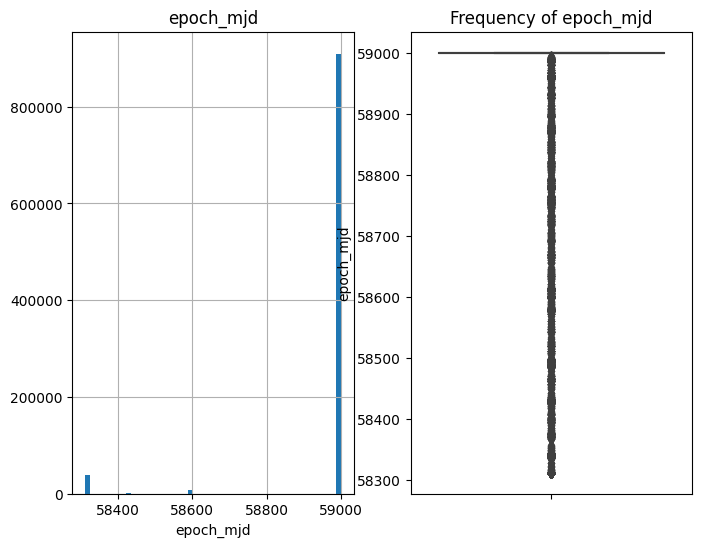

#####################################
count     958524.000
mean    20199446.009
std         4863.546
min     20176278.500
5%      20190830.000
10%     20200531.000
20%     20200531.000
30%     20200531.000
40%     20200531.000
50%     20200531.000
60%     20200531.000
70%     20200531.000
80%     20200531.000
90%     20200531.000
95%     20200531.000
99%     20200531.000
max     20200531.000
Name: epoch_cal, dtype: float64


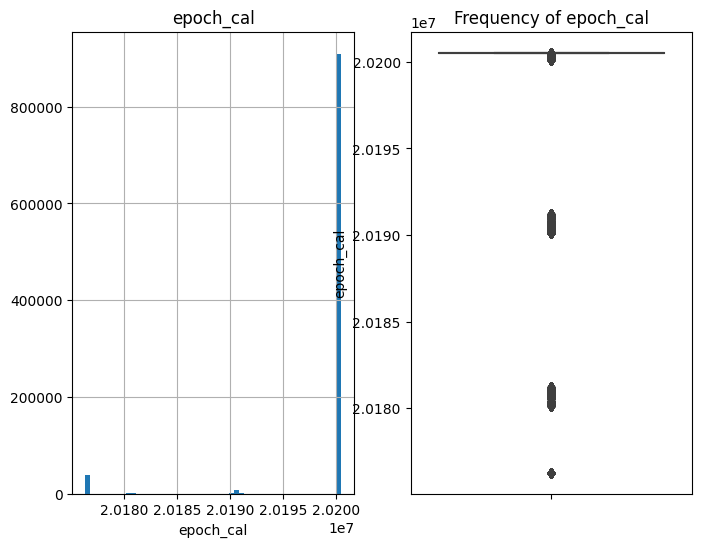

#####################################
count   958524.000
mean         0.156
std          0.091
min          0.000
5%           0.040
10%          0.056
20%          0.081
30%          0.103
40%          0.125
50%          0.145
60%          0.166
70%          0.189
80%          0.214
90%          0.256
95%          0.300
99%          0.513
max          0.690
Name: e, dtype: float64


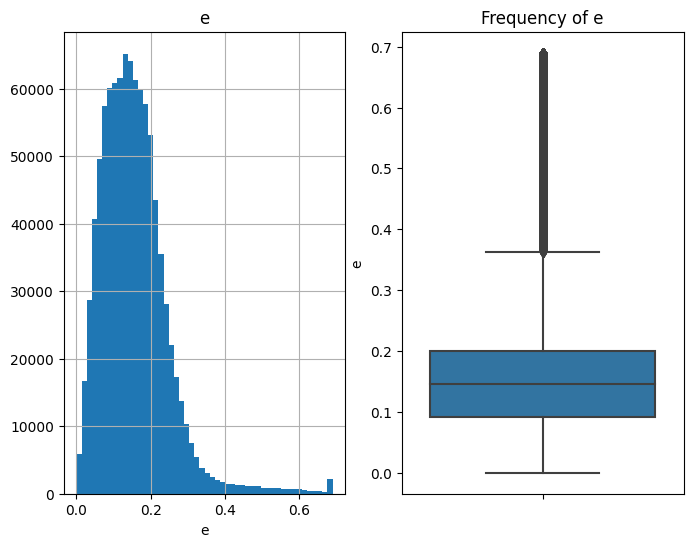

#####################################
count   958524.000
mean         2.683
std          0.443
min          0.612
5%           2.159
10%          2.254
20%          2.348
30%          2.433
40%          2.578
50%          2.647
60%          2.733
70%          2.877
80%          3.062
90%          3.146
95%          3.190
99%          4.737
max          4.737
Name: a, dtype: float64


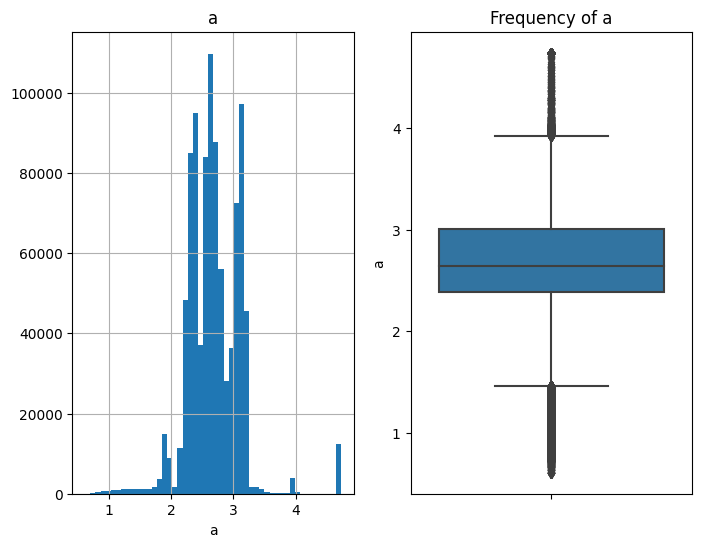

#####################################
count   958524.000
mean         2.279
std          0.505
min          0.071
5%           1.694
10%          1.801
20%          1.923
30%          2.018
40%          2.114
50%          2.226
60%          2.360
70%          2.508
80%          2.649
90%          2.819
95%          2.939
99%          4.730
max          4.806
Name: q, dtype: float64


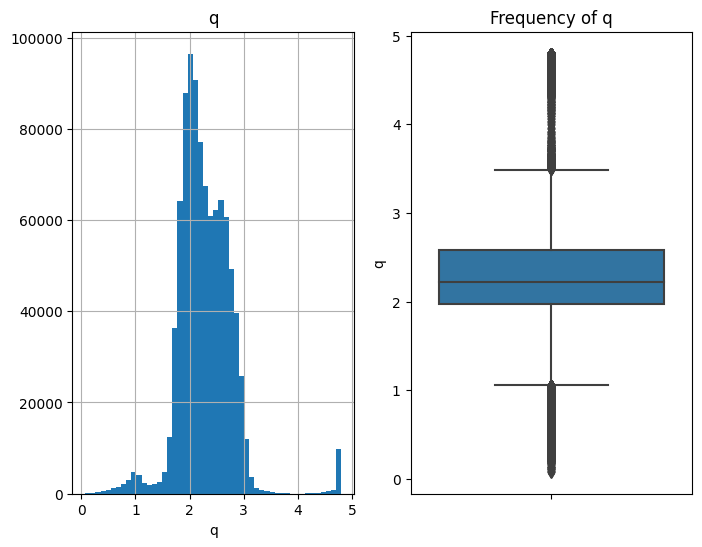

#####################################
count   958524.000
mean         9.043
std          6.493
min          0.008
5%           1.660
10%          2.342
20%          3.528
30%          4.795
40%          6.007
50%          7.416
60%          9.358
70%         11.292
80%         13.599
90%         17.339
95%         22.624
99%         29.080
max         54.071
Name: i, dtype: float64


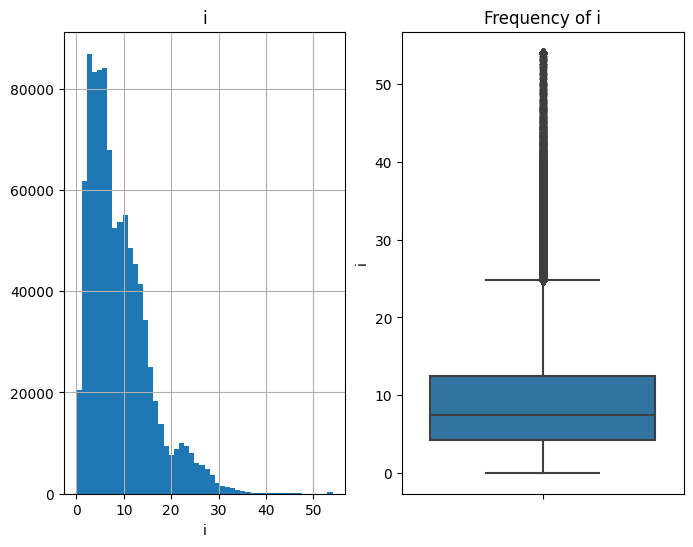

#####################################
count   958524.000
mean       168.456
std        102.882
min          0.000
5%          17.180
10%         33.414
20%         64.868
30%         96.693
40%        128.274
50%        159.827
60%        192.827
70%        230.242
80%        276.637
90%        321.758
95%        341.667
99%        356.464
max        360.000
Name: om, dtype: float64


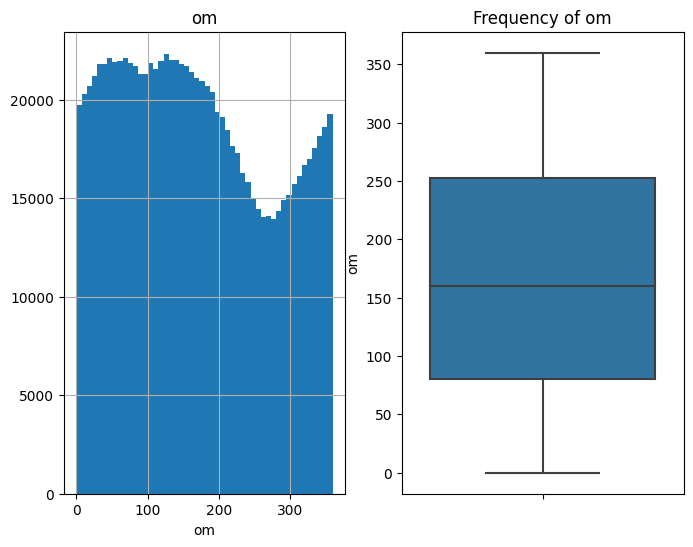

#####################################
count   958524.000
mean       181.369
std        103.888
min          0.000
5%          18.201
10%         36.525
20%         73.365
30%        109.644
40%        146.060
50%        182.358
60%        218.349
70%        254.010
80%        289.072
90%        324.312
95%        342.101
99%        356.418
max        360.000
Name: w, dtype: float64


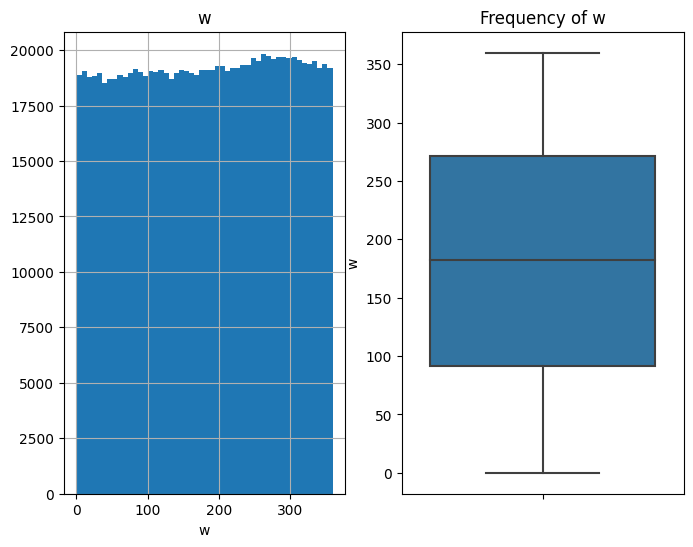

#####################################
count   958523.000
mean       177.353
std        105.817
min        -70.704
5%          16.525
10%         32.989
20%         66.632
30%        101.544
40%        138.194
50%        175.641
60%        213.164
70%        250.942
80%        288.685
90%        325.638
95%        343.402
99%        357.043
max        491.618
Name: ma, dtype: float64


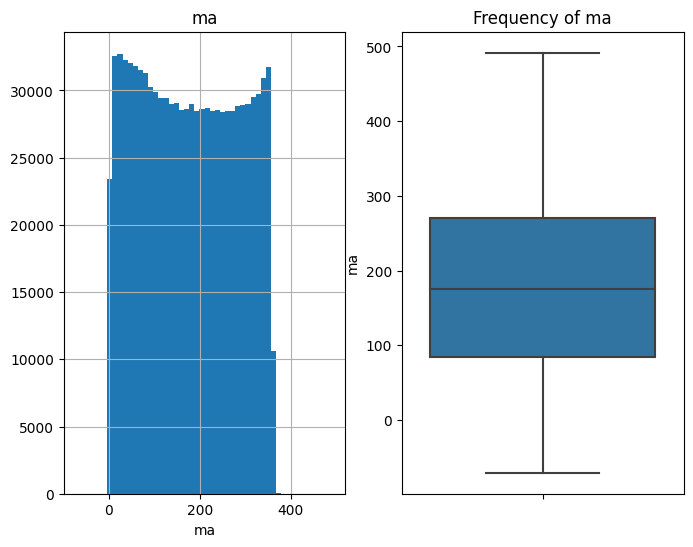

#####################################
count   958520.000
mean         3.100
std          0.552
min          0.654
5%           2.405
10%          2.567
20%          2.722
30%          2.834
40%          2.933
50%          3.047
60%          3.171
70%          3.298
80%          3.442
90%          3.671
95%          3.863
99%          5.483
max          6.051
Name: ad, dtype: float64


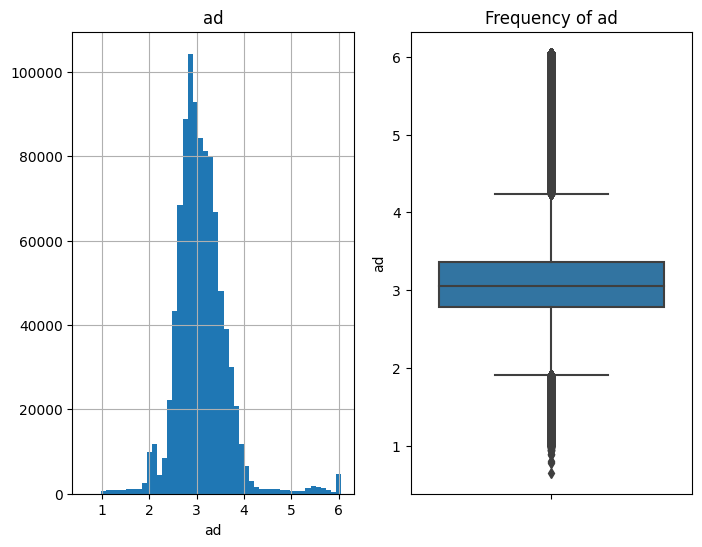

#####################################
count   958524.000
mean         0.234
std          0.059
min          0.000
5%           0.173
10%          0.177
20%          0.184
30%          0.202
40%          0.218
50%          0.229
60%          0.238
70%          0.260
80%          0.274
90%          0.291
95%          0.311
99%          0.506
max          0.517
Name: n, dtype: float64


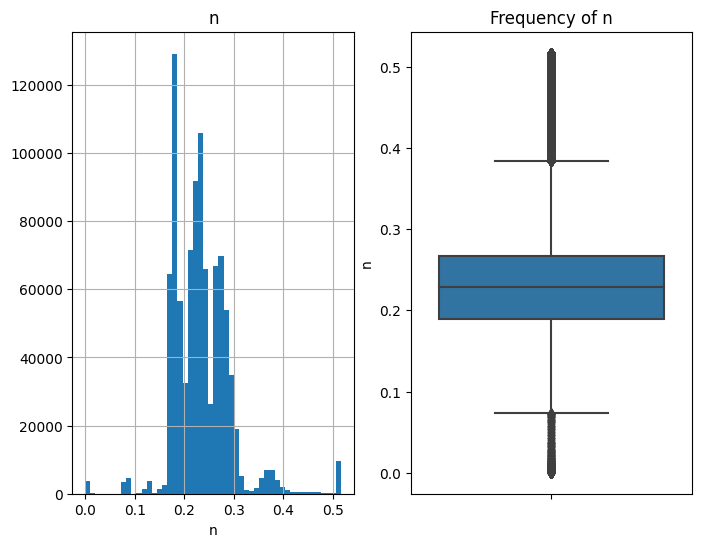

#####################################
count    958524.000
mean    2458883.809
std         749.442
min     2455520.958
5%      2458056.742
10%     2458285.120
20%     2458478.628
30%     2458639.076
40%     2458790.051
50%     2458944.591
60%     2459109.344
70%     2459276.752
80%     2459447.525
90%     2459624.400
95%     2459747.265
99%     2459965.603
max     2462283.049
Name: tp, dtype: float64


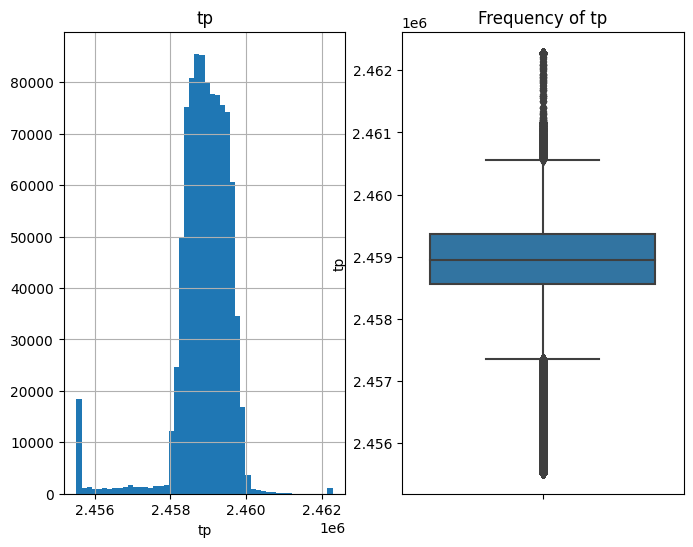

#####################################
count     958524.000
mean    20196445.048
std        21319.678
min     20096650.458
5%      20171030.242
10%     20180615.620
20%     20181226.128
30%     20190604.576
40%     20191102.551
50%     20200405.091
60%     20200916.844
70%     20210303.252
80%     20210821.025
90%     20220213.900
95%     20220616.765
99%     20230121.103
max     20294996.549
Name: tp_cal, dtype: float64


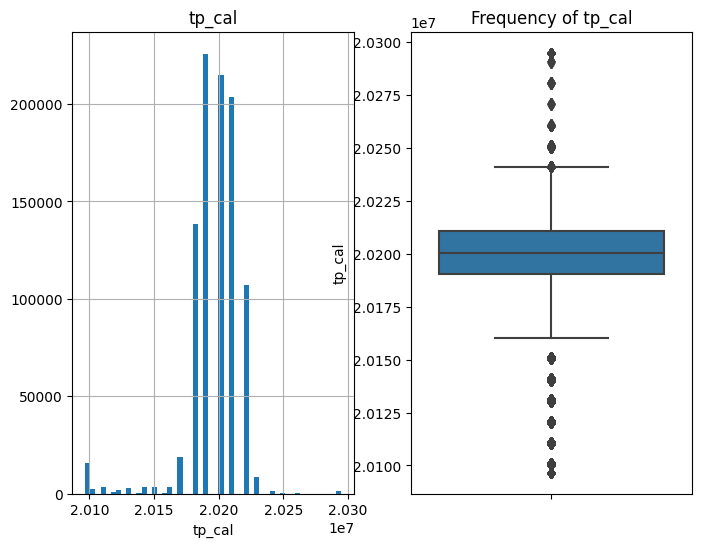

#####################################
count   958520.000
mean      1617.714
std        392.070
min        151.192
5%        1158.558
10%       1235.679
20%       1314.405
30%       1386.383
40%       1511.727
50%       1572.976
60%       1650.314
70%       1782.765
80%       1956.803
90%       2038.285
95%       2081.263
99%       3465.321
max       3465.321
Name: per, dtype: float64


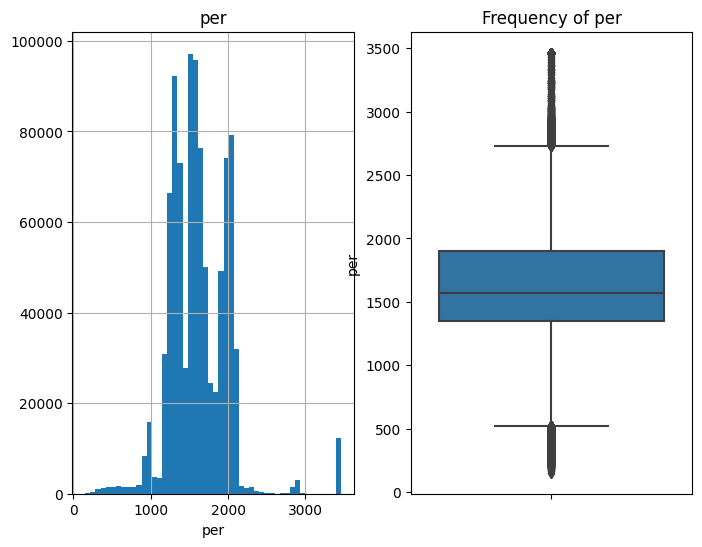

#####################################
count   958523.000
mean         4.429
std          1.073
min          0.000
5%           3.172
10%          3.383
20%          3.599
30%          3.796
40%          4.139
50%          4.307
60%          4.518
70%          4.881
80%          5.357
90%          5.581
95%          5.698
99%          9.488
max          9.488
Name: per_y, dtype: float64


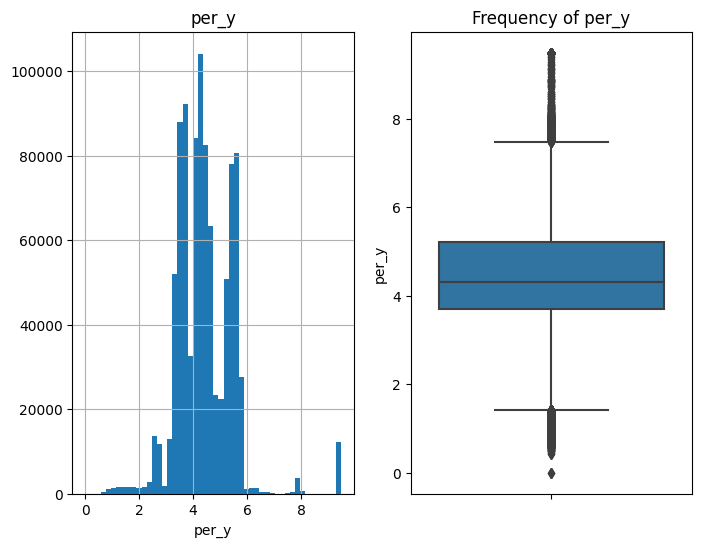

#####################################
count   938603.000
mean         1.297
std          0.495
min          0.000
5%           0.717
10%          0.815
20%          0.930
30%          1.028
40%          1.126
50%          1.241
60%          1.377
70%          1.525
80%          1.661
90%          1.833
95%          1.954
99%          3.760
max          3.811
Name: moid, dtype: float64


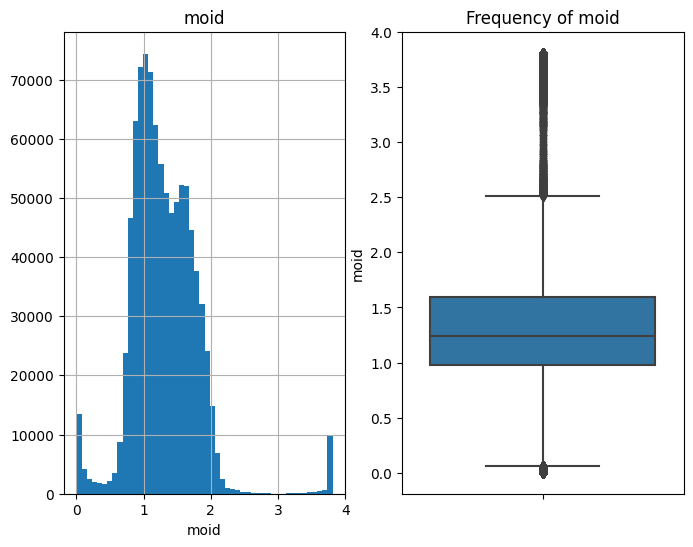

#####################################
count   958397.000
mean       494.854
std        207.068
min          0.000
5%         213.437
10%        305.999
20%        355.359
30%        394.618
40%        433.096
50%        477.706
60%        531.096
70%        589.916
80%        644.333
90%        711.688
95%        759.349
99%       1457.548
max       1578.216
Name: moid_ld, dtype: float64


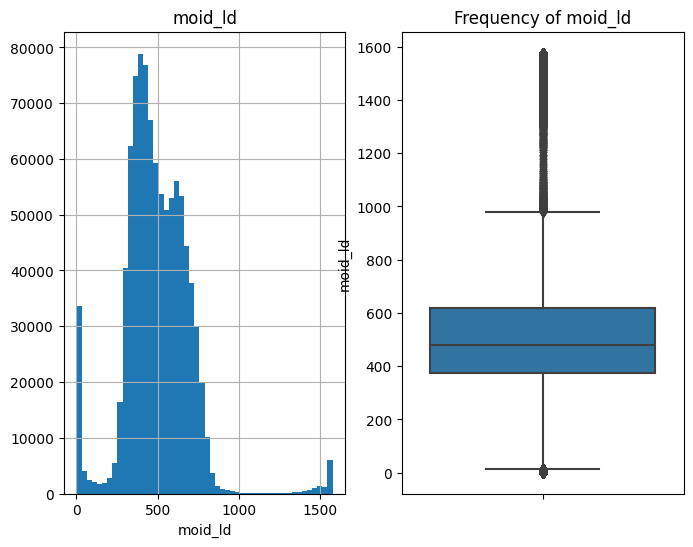

#####################################
count   938602.000
mean         0.000
std          0.001
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.000
90%          0.000
95%          0.001
99%          0.003
max          0.003
Name: sigma_e, dtype: float64


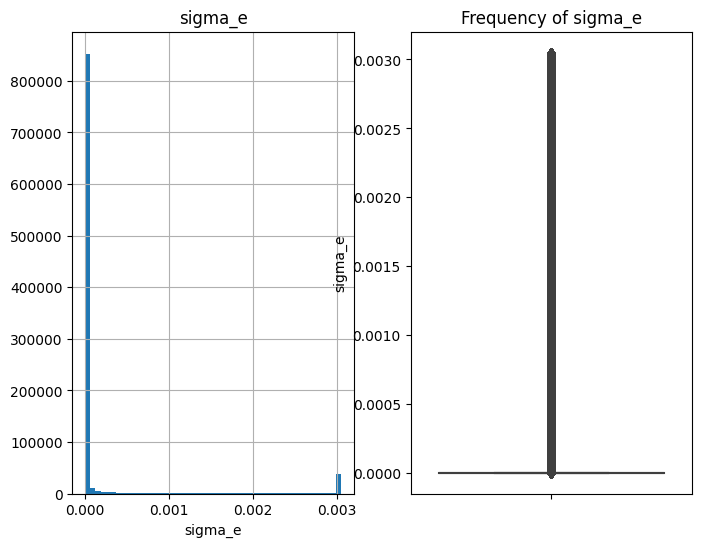

#####################################
count   938602.000
mean         0.000
std          0.002
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.000
90%          0.000
95%          0.003
99%          0.008
max          0.008
Name: sigma_a, dtype: float64


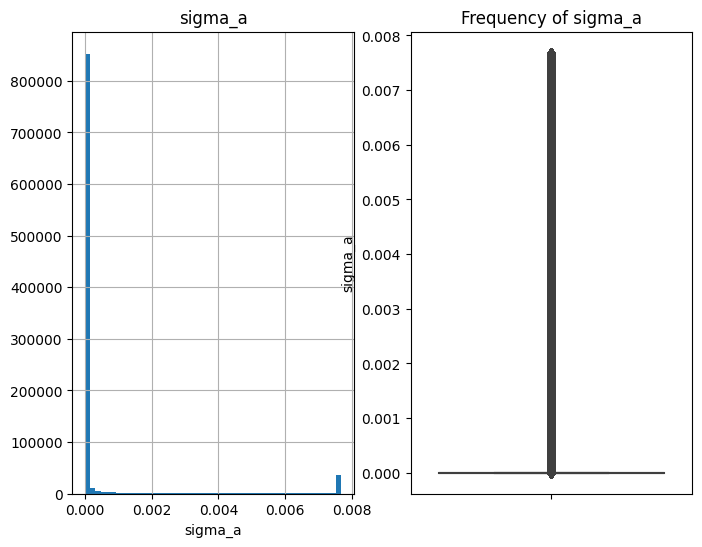

#####################################
count   938602.000
mean         0.000
std          0.001
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.000
90%          0.000
95%          0.003
99%          0.007
max          0.007
Name: sigma_q, dtype: float64


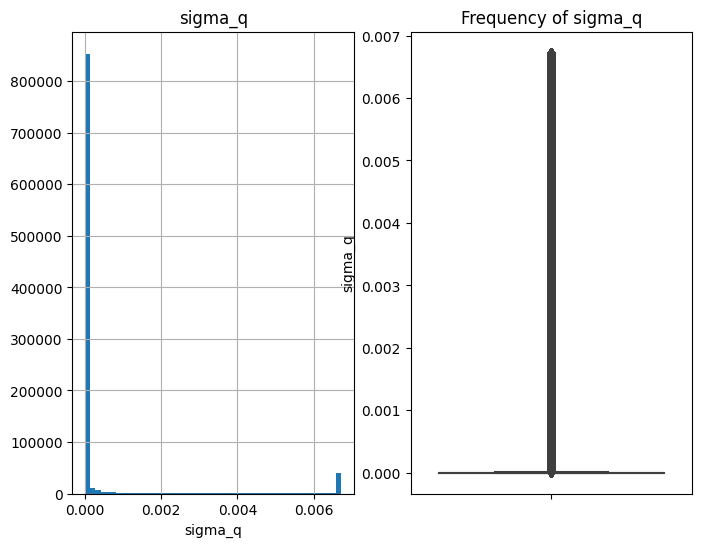

#####################################
count   938602.000
mean         0.003
std          0.011
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.000
90%          0.001
95%          0.022
99%          0.055
max          0.055
Name: sigma_i, dtype: float64


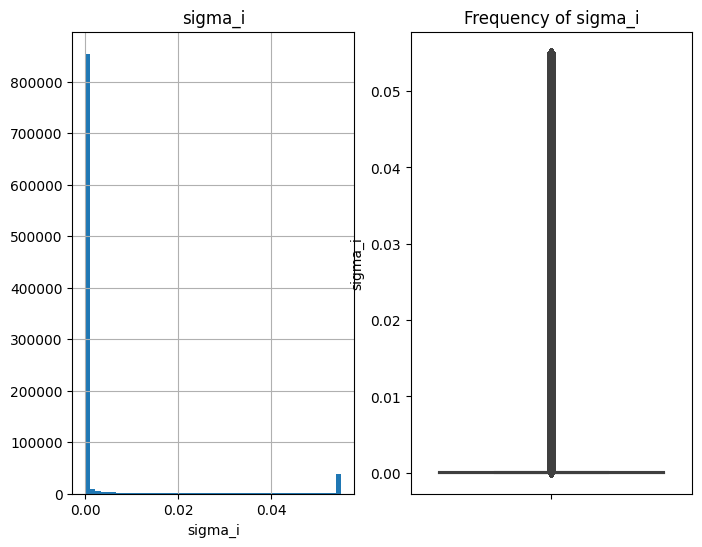

#####################################
count   938602.000
mean         0.004
std          0.015
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.000
90%          0.001
95%          0.028
99%          0.069
max          0.069
Name: sigma_om, dtype: float64


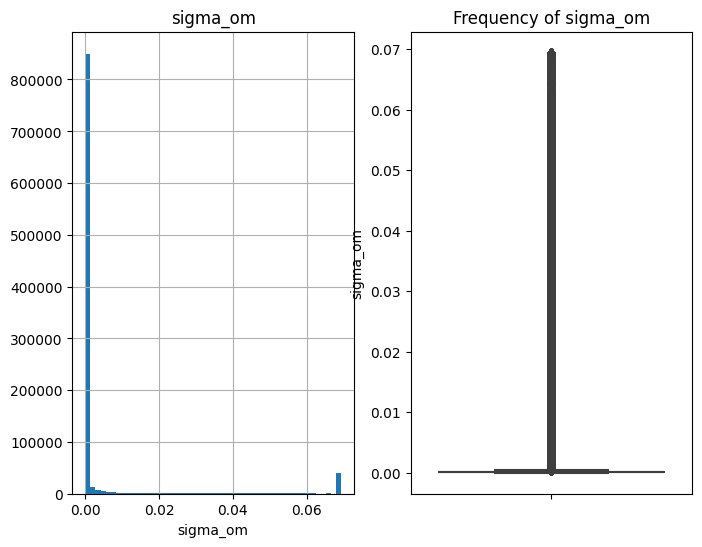

#####################################
count   938602.000
mean         0.048
std          0.194
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.001
90%          0.012
95%          0.370
99%          0.925
max          0.925
Name: sigma_w, dtype: float64


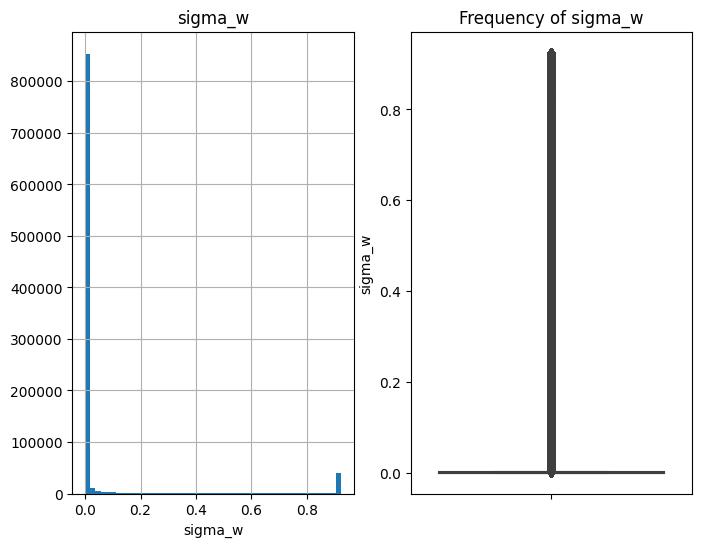

#####################################
count   938602.000
mean         0.084
std          0.330
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.000
90%          0.024
95%          0.644
99%          1.611
max          1.611
Name: sigma_ma, dtype: float64


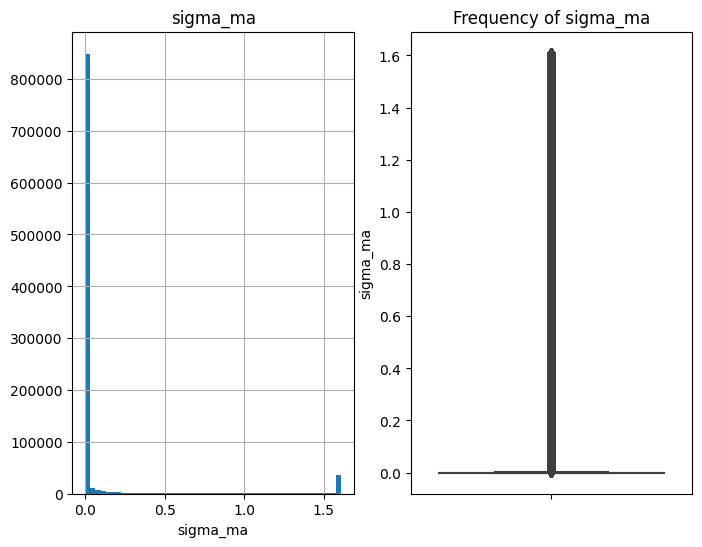

#####################################
count   938598.000
mean         0.000
std          0.002
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.000
90%          0.000
95%          0.004
99%          0.009
max          0.009
Name: sigma_ad, dtype: float64


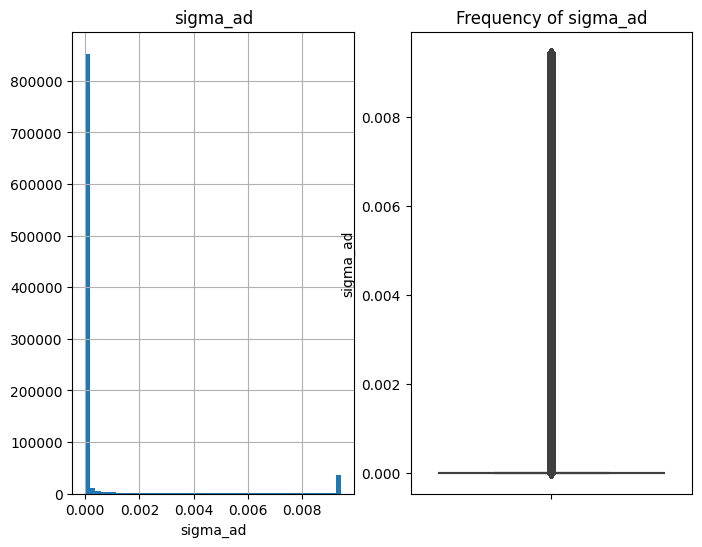

#####################################
count   938602.000
mean         0.000
std          0.000
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.000
90%          0.000
95%          0.000
99%          0.001
max          0.001
Name: sigma_n, dtype: float64


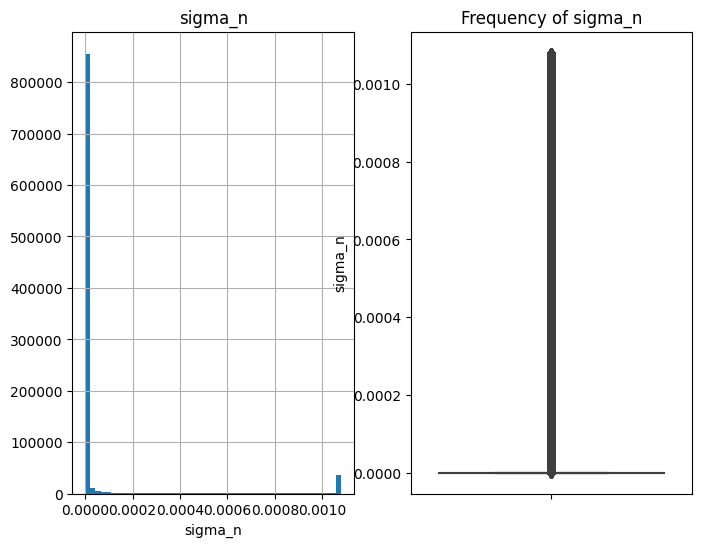

#####################################
count   938602.000
mean         0.367
std          1.464
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.001
80%          0.002
90%          0.084
95%          2.844
99%          7.110
max          7.110
Name: sigma_tp, dtype: float64


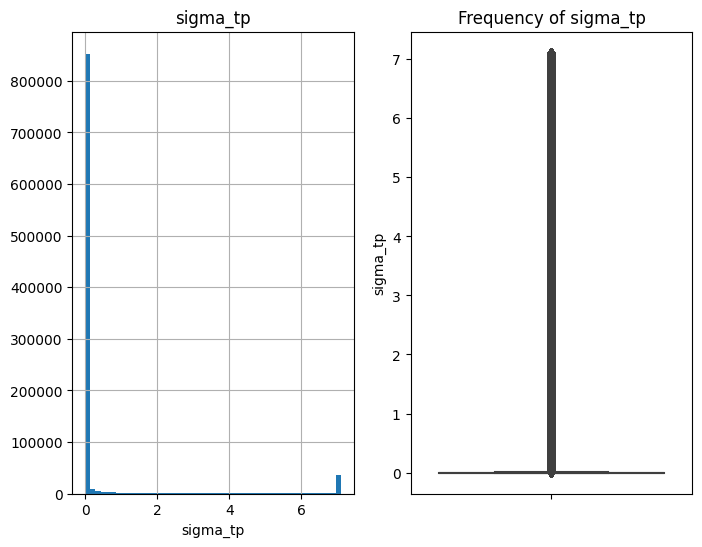

#####################################
count   938598.000
mean         0.356
std          1.432
min          0.000
5%           0.000
10%          0.000
20%          0.000
30%          0.000
40%          0.000
50%          0.000
60%          0.000
70%          0.000
80%          0.000
90%          0.080
95%          2.786
99%          6.964
max          6.964
Name: sigma_per, dtype: float64


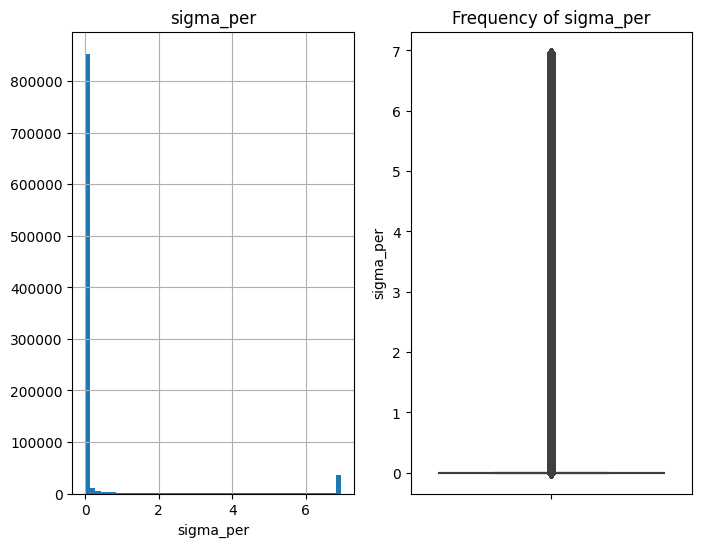

#####################################
count   958522.000
mean         0.558
std          0.103
min          0.000
5%           0.369
10%          0.449
20%          0.504
30%          0.530
40%          0.549
50%          0.566
60%          0.584
70%          0.603
80%          0.627
90%          0.664
95%          0.699
99%          0.780
max          1.195
Name: rms, dtype: float64


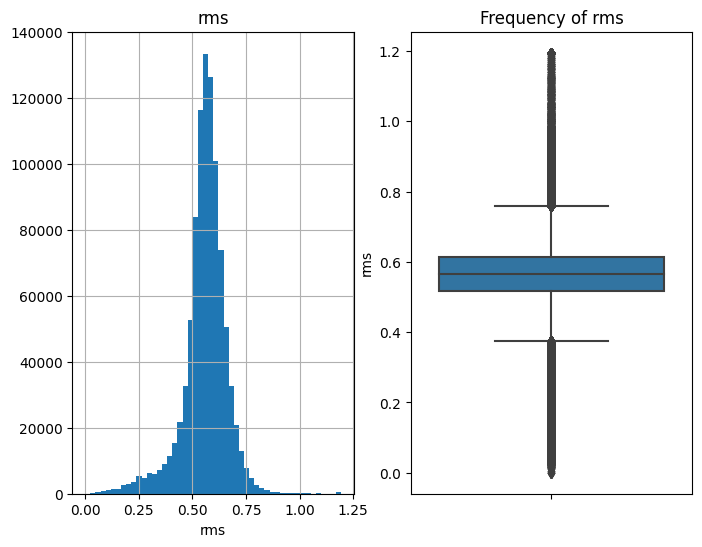

#####################################
count   958524.000
mean     18377.379
std       1625.543
min      13686.288
5%       16678.038
10%      16794.445
20%      17024.393
30%      17561.280
40%      18019.045
50%      18309.648
60%      18553.656
70%      19096.754
80%      19439.176
90%      19843.527
95%      20274.577
99%      23850.340
max      38090.865
Name: orbital_speed, dtype: float64


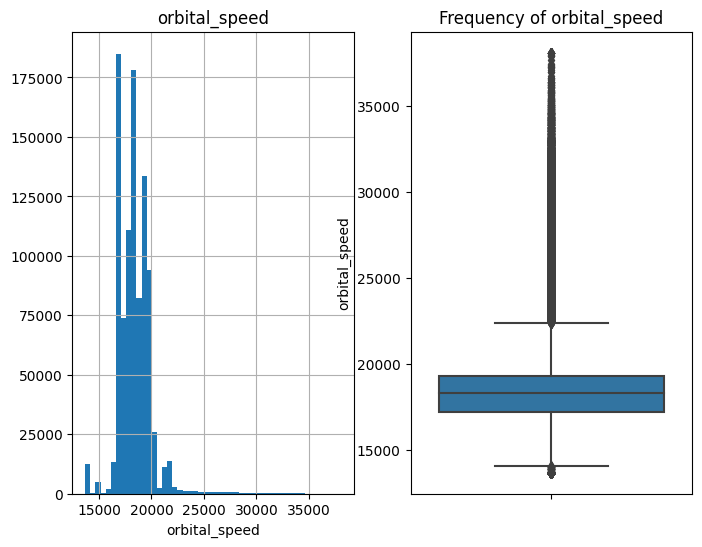

#####################################
count       958524.000
mean    -170185216.223
std       32857712.389
min     -725457014.398
5%      -205529245.812
10%     -196882787.890
20%     -188940784.613
30%     -182343015.009
40%     -172119068.336
50%     -167621606.932
60%     -162342984.450
70%     -154199283.555
80%     -144914977.140
90%     -141026689.287
95%     -139078478.439
99%      -93657238.946
max      -93657238.946
Name: orbital_energy, dtype: float64


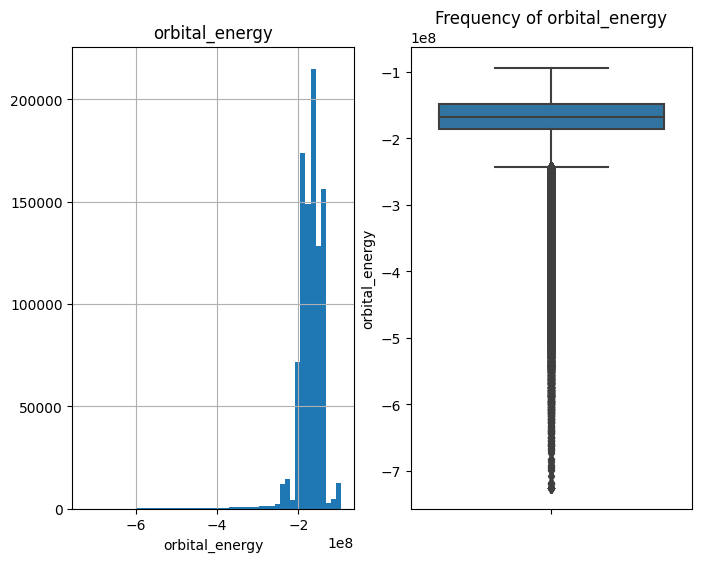

#####################################
count   136209.000
mean       133.671
std        322.651
min          0.000
5%           9.105
10%         12.933
20%         20.364
30%         28.482
40%         37.784
50%         49.564
60%         65.411
70%         87.915
80%        127.516
90%        234.682
95%        461.406
99%       2418.159
max       2418.159
Name: surface_area, dtype: float64


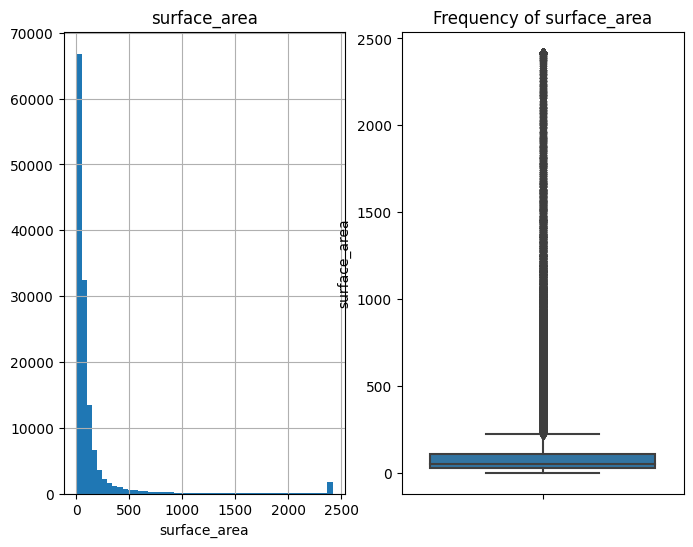

#####################################
count   136209.000
mean       319.503
std       1393.800
min          0.000
5%           2.583
10%          4.374
20%          8.641
30%         14.293
40%         21.839
50%         32.812
60%         49.745
70%         77.511
80%        135.401
90%        338.059
95%        931.964
99%      11181.528
max      11181.528
Name: volume, dtype: float64


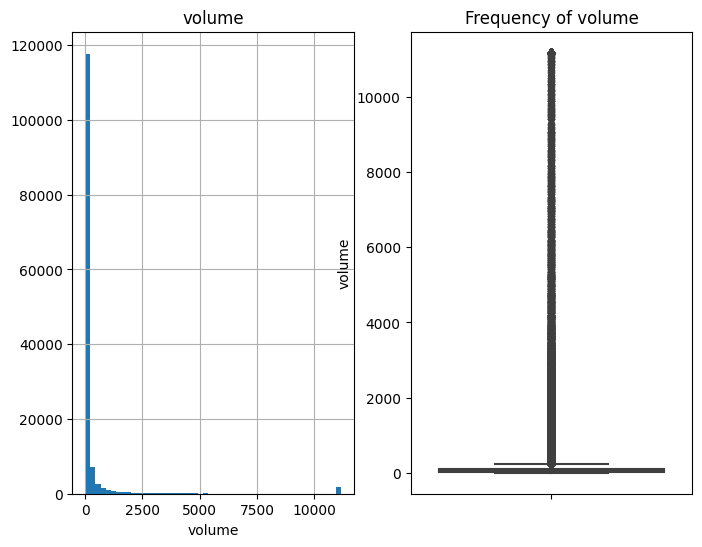

#####################################
count     136209.000
mean      830706.626
std      3623879.401
min            0.000
5%          6716.715
10%        11371.509
20%        22467.108
30%        37162.441
40%        56781.811
50%        85309.950
60%       129337.177
70%       201529.667
80%       352042.248
90%       878952.710
95%      2423105.519
99%     29071972.662
max     29071972.662
Name: mass, dtype: float64


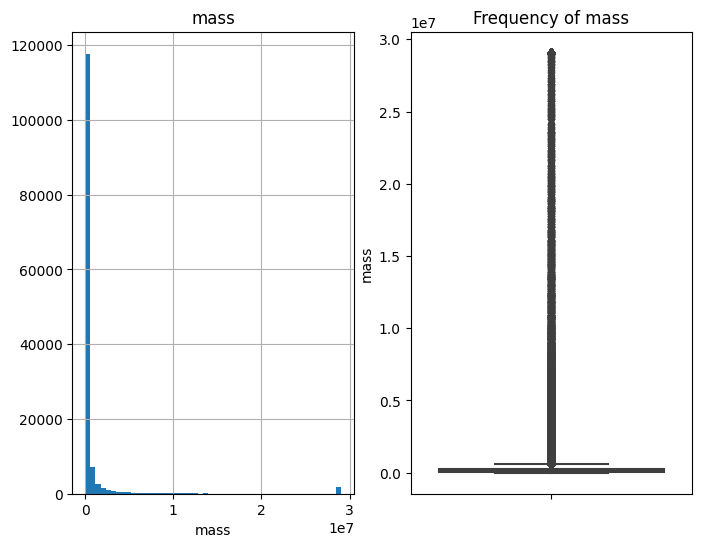

#####################################


In [27]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(8, 6))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe)
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)      

    print("#####################################")

for col in num_cols:
    num_summary(df, col, plot=True)

In [28]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "pha", col)

         H
pha       
N   16.881
Y   20.070


     diameter
pha          
N       5.070
Y       0.907


     albedo
pha        
N     0.130
Y     0.188


     diameter_sigma
pha                
N             0.469
Y             0.120


          epoch
pha            
N   2458971.720
Y   2458952.311


     epoch_mjd
pha           
N    58971.220
Y    58951.811


       epoch_cal
pha             
N   20199525.501
Y   20198856.899


        e
pha      
N   0.155
Y   0.518


        a
pha      
N   2.686
Y   1.766


        q
pha      
N   2.283
Y   0.760


         i
pha       
N    9.026
Y   13.753


         om
pha        
N   168.438
Y   173.657


          w
pha        
N   181.385
Y   180.647


         ma
pha        
N   177.192
Y   180.189


       ad
pha      
N   3.101
Y   2.770


        n
pha      
N   0.234
Y   0.406


             tp
pha            
N   2458885.613
Y   2458811.180


          tp_cal
pha             
N   20196493.261
Y   20194192.967


         per
pha        

In [29]:
df["class"].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO', 'IEO', 'HYA'], dtype=object)

In [30]:
df.head()

,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms,orbital_speed,orbital_energy,surface_area,volume,mass,asteroid_type
0,N,7.350,27.744,0.090,0.200,2458600.500,58600.000,20190427.000,0.076,2.769,2.559,10.594,80.306,73.598,77.372,2.980,0.214,2458238.754,20180430.254,1683.146,4.608,1.595,620.641,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.433,17901.113,-160224918.901,2418.159,11181.528,29071972.662,C-type
1,N,7.350,27.744,0.101,3.104,2459000.500,59000.000,20200531.000,0.230,2.774,2.136,34.833,173.025,310.202,144.976,3.412,0.213,2458320.962,20180721.462,1687.411,4.620,1.234,480.349,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.359,17886.017,-159954803.395,2418.159,11181.528,29071972.662,S-type
2,N,7.350,27.744,0.214,3.104,2459000.500,59000.000,20200531.000,0.257,2.668,1.983,12.991,169.851,248.066,125.435,3.354,0.226,2458445.792,20181123.292,1592.014,4.359,1.034,402.515,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.338,18236.367,-166282542.327,2418.159,11181.528,29071972.662,S-type
3,N,7.350,27.744,0.423,0.200,2458600.500,58600.000,20190427.000,0.089,2.361,2.152,7.142,103.811,150.729,95.862,2.571,0.272,2458247.560,20180509.060,1325.433,3.629,1.139,443.451,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.400,19385.099,-187891038.895,2418.159,11181.528,29071972.662,Unknown
4,N,7.350,27.744,0.274,3.104,2459000.500,59000.000,20200531.000,0.191,2.574,2.083,5.367,141.571,358.648,17.846,3.065,0.239,2458925.723,20200317.223,1508.414,4.130,1.096,426.433,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,MBA,0.522,18567.227,-172370953.890,2418.159,11181.528,29071972.662,Unknown


In [31]:
cat_cols

['pha', 'class', 'asteroid_type']

In [32]:
print(num_cols)

['H', 'diameter', 'albedo', 'diameter_sigma', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms', 'orbital_speed', 'orbital_energy', 'surface_area', 'volume', 'mass']


In [33]:
le = LabelEncoder()
for i in cat_cols[1:]:
    if i != "class":
        df[i] = le.fit_transform(df[i])

In [34]:
df["pha"] = df["pha"].map({"Y":1, "N":0, np.nan:2})

In [35]:
df_dum = pd.get_dummies(df, columns = ["class"], drop_first = True, dtype = int)

In [36]:
df_dum.head()

,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,orbital_speed,orbital_energy,surface_area,volume,mass,asteroid_type,class_APO,class_AST,class_ATE,class_CEN,class_HYA,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,0,7.350,27.744,0.090,0.200,2458600.500,58600.000,20190427.000,0.076,2.769,2.559,10.594,80.306,73.598,77.372,2.980,0.214,2458238.754,20180430.254,1683.146,4.608,1.595,620.641,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.433,17901.113,-160224918.901,2418.159,11181.528,29071972.662,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,7.350,27.744,0.101,3.104,2459000.500,59000.000,20200531.000,0.230,2.774,2.136,34.833,173.025,310.202,144.976,3.412,0.213,2458320.962,20180721.462,1687.411,4.620,1.234,480.349,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.359,17886.017,-159954803.395,2418.159,11181.528,29071972.662,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,7.350,27.744,0.214,3.104,2459000.500,59000.000,20200531.000,0.257,2.668,1.983,12.991,169.851,248.066,125.435,3.354,0.226,2458445.792,20181123.292,1592.014,4.359,1.034,402.515,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.338,18236.367,-166282542.327,2418.159,11181.528,29071972.662,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,7.350,27.744,0.423,0.200,2458600.500,58600.000,20190427.000,0.089,2.361,2.152,7.142,103.811,150.729,95.862,2.571,0.272,2458247.560,20180509.060,1325.433,3.629,1.139,443.451,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.400,19385.099,-187891038.895,2418.159,11181.528,29071972.662,2,0,0,0,0,0,0,0,1,0,0,0,0
4,0,7.350,27.744,0.274,3.104,2459000.500,59000.000,20200531.000,0.191,2.574,2.083,5.367,141.571,358.648,17.846,3.065,0.239,2458925.723,20200317.223,1508.414,4.130,1.096,426.433,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.522,18567.227,-172370953.890,2418.159,11181.528,29071972.662,2,0,0,0,0,0,0,0,1,0,0,0,0


In [37]:
df_dum["pha"].value_counts()
# 0 : N , 1 : Y, 2 : Nan

pha
0    936537
2     19921
1      2066
Name: count, dtype: int64

In [38]:
df_dum.isnull().sum()

pha                    0
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
epoch                  0
epoch_mjd              0
epoch_cal              0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926
sigma_n            19922
sigma_tp           19922
sigma_per          19926
rms                    2
orbital_speed          0
orbital_energy         0
surface_area      822315
volume            822315
mass              822315


In [39]:
df_fixed = df_dum.dropna()

In [40]:
df_fixed.shape

(131142, 53)

In [41]:
df_dum.shape

(958524, 53)

In [42]:
#df["pha"] = df["pha"].map({"2":np.nan})

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #699; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ML MODELLING </div>

In [43]:
y = df_dum["pha"]
X = df_dum.drop("pha", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #699; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> SPIMPLE IMPUTER </div>

In [44]:
unique, counts = np.unique(y_test, return_counts=True)
for value, count in zip(unique, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 234134
Value: 1, Count: 517
Value: 2, Count: 4980


In [45]:
imputer = SimpleImputer(strategy='median') 
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer.transform(X_test[num_cols])

In [46]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [47]:
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, l2_leaf_reg=10, verbose= False)
model.fit(X_train, y_train)

In [48]:
cv_results = cross_validate(model, X, y, cv=kfold, scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()

0.9998528988275966

In [49]:
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    234118
           1       0.97      0.94      0.95       533
           2       1.00      1.00      1.00      4980

    accuracy                           1.00    239631
   macro avg       0.99      0.98      0.98    239631
weighted avg       1.00      1.00      1.00    239631



In [50]:
y_pred_proba = model.predict_proba(X_test)

In [51]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_test, y_pred, average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test, y_pred, average='macro'), 2)}")
print(f"F1: {round(f1_score(y_test, y_pred, average='macro'), 2)}")
print(f"Auc: {round(roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovo'), 2)}")

Accuracy: 1.0
Recall: 0.99
Precision: 0.98
F1: 0.98
Auc: 1.0


    Value         Feature
21 39.999         moid_ld
33  7.815             rms
22  5.879         sigma_e
30  5.535         sigma_n
27  4.475         sigma_w
29  3.862        sigma_ad
20  3.462            moid
25  3.022         sigma_i
23  2.809         sigma_a
26  2.634        sigma_om
0   2.462               H
16  2.234              tp
28  1.889        sigma_ma
11  1.556              om
32  1.533       sigma_per
24  1.493         sigma_q
13  1.373              ma
10  1.101               i
17  1.016          tp_cal
12  0.678               w
9   0.572               q
7   0.542               e
14  0.536              ad
31  0.521        sigma_tp
35  0.385  orbital_energy
15  0.371               n
19  0.350           per_y
39  0.258   asteroid_type
6   0.212       epoch_cal
5   0.193       epoch_mjd
18  0.192             per
34  0.183   orbital_speed
40  0.178       class_APO
4   0.171           epoch
2   0.129          albedo
8   0.087               a
3   0.086  diameter_sigma
1   0.068   

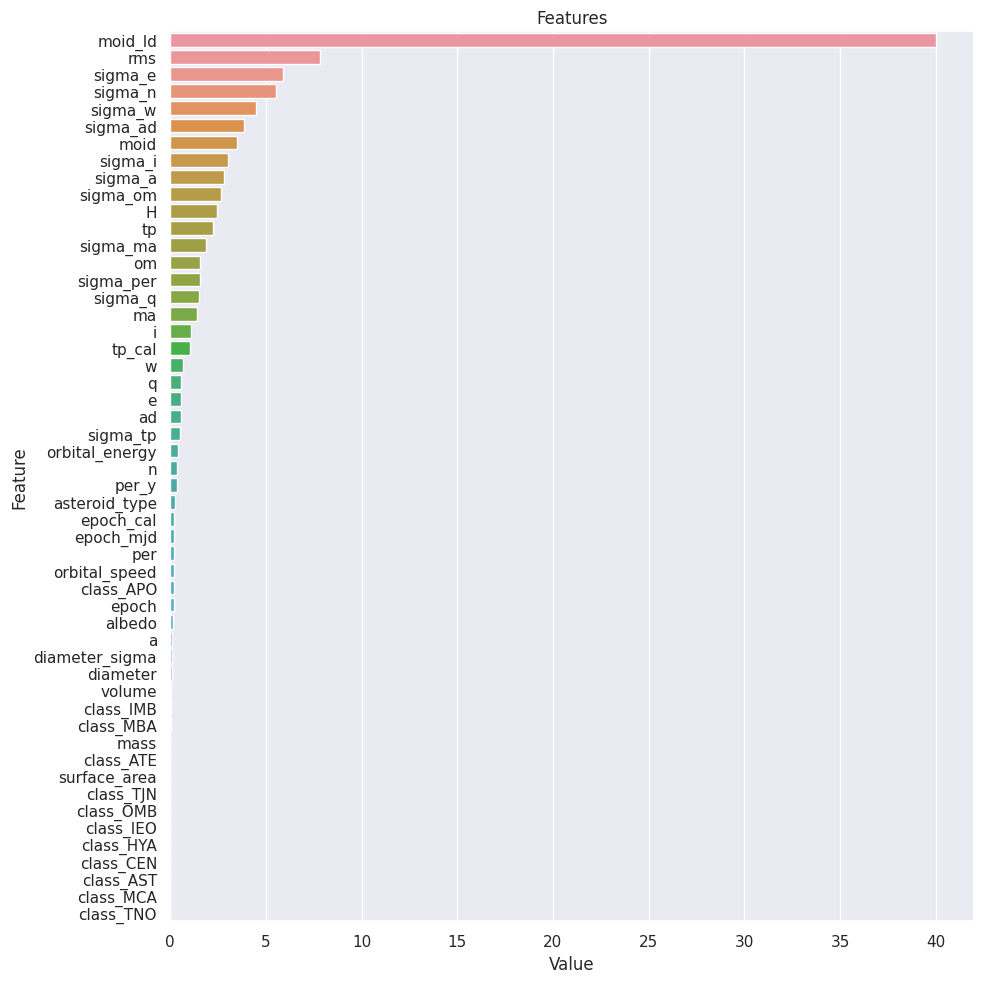

In [52]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(model, X)

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 32.249999999999986, 'Predicted Labels')

Text(66.25, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix')

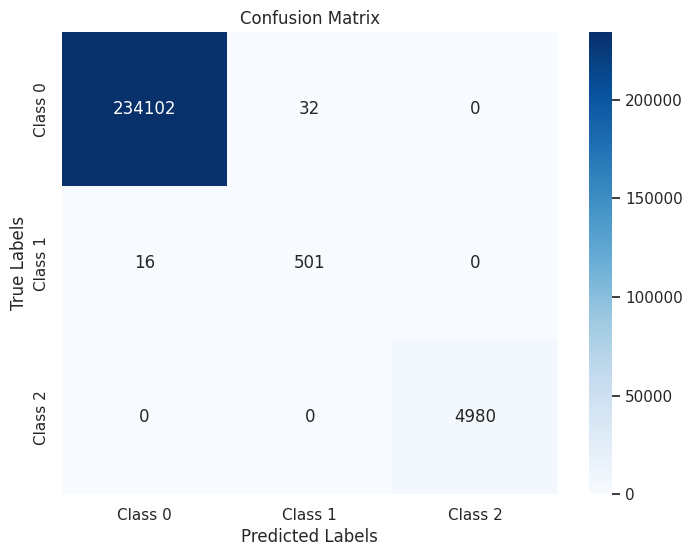

In [53]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Class 0', 'Class 1','Class 2']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #699; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> WITHOUT SIMPLE IMPUTER </div>

In [54]:
df_fixed.head()

,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,orbital_speed,orbital_energy,surface_area,volume,mass,asteroid_type,class_APO,class_AST,class_ATE,class_CEN,class_HYA,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,0,7.350,27.744,0.090,0.200,2458600.500,58600.000,20190427.000,0.076,2.769,2.559,10.594,80.306,73.598,77.372,2.980,0.214,2458238.754,20180430.254,1683.146,4.608,1.595,620.641,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.433,17901.113,-160224918.901,2418.159,11181.528,29071972.662,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,7.350,27.744,0.101,3.104,2459000.500,59000.000,20200531.000,0.230,2.774,2.136,34.833,173.025,310.202,144.976,3.412,0.213,2458320.962,20180721.462,1687.411,4.620,1.234,480.349,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.359,17886.017,-159954803.395,2418.159,11181.528,29071972.662,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,7.350,27.744,0.214,3.104,2459000.500,59000.000,20200531.000,0.257,2.668,1.983,12.991,169.851,248.066,125.435,3.354,0.226,2458445.792,20181123.292,1592.014,4.359,1.034,402.515,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.338,18236.367,-166282542.327,2418.159,11181.528,29071972.662,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,7.350,27.744,0.423,0.200,2458600.500,58600.000,20190427.000,0.089,2.361,2.152,7.142,103.811,150.729,95.862,2.571,0.272,2458247.560,20180509.060,1325.433,3.629,1.139,443.451,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.400,19385.099,-187891038.895,2418.159,11181.528,29071972.662,2,0,0,0,0,0,0,0,1,0,0,0,0
4,0,7.350,27.744,0.274,3.104,2459000.500,59000.000,20200531.000,0.191,2.574,2.083,5.367,141.571,358.648,17.846,3.065,0.239,2458925.723,20200317.223,1508.414,4.130,1.096,426.433,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.522,18567.227,-172370953.890,2418.159,11181.528,29071972.662,2,0,0,0,0,0,0,0,1,0,0,0,0


In [55]:
df_fixed.shape

(131142, 53)

In [56]:
y = df_fixed["pha"]
X = df_fixed.drop("pha", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

In [57]:
unique, counts = np.unique(y_test, return_counts=True)
for value, count in zip(unique, counts):
    print(f"Value: {value}, Count: {count}")

Value: 0, Count: 32741
Value: 1, Count: 45


In [58]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.500692323355732, 1: 361.6029411764706}


In [59]:
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, l2_leaf_reg=10, verbose= False)
model.fit(X_train, y_train)

In [60]:
cv_results = cross_validate(model, X, y, cv=kfold, scoring=["accuracy", "f1", "roc_auc"])

cv_results['test_accuracy'].mean()
cv_results['test_f1'].mean()
cv_results['test_roc_auc'].mean()

0.9989553346991871

0.5845662954358606

0.999494549190233

In [61]:
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32753
           1       0.47      0.64      0.54        33

    accuracy                           1.00     32786
   macro avg       0.73      0.82      0.77     32786
weighted avg       1.00      1.00      1.00     32786



In [62]:
"""lgbm = LGBMClassifier(verbose = -1, device = 'gpu')
lgbm_params = {
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.8, 1.0],
    "n_estimators": [200, 300]}
lgbm_gs_best = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose = -1).fit(X_train, y_train)"""

'lgbm = LGBMClassifier(verbose = -1, device = \'gpu\')\nlgbm_params = {\n    "learning_rate": [0.01, 0.03, 0.05, 0.1],\n    "max_depth":[3,5,8],\n    "subsample":[0.5, 0.8, 1.0],\n    "n_estimators": [200, 300]}\nlgbm_gs_best = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose = -1).fit(X_train, y_train)'

In [63]:
best_params = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}

In [64]:
lgbm = LGBMClassifier(**best_params, verbose = -1)
lgbm.fit(X_train, y_train)
lgbm.score(X_test, y_test)

LGBMClassifier(learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.5,
               verbose=-1)

0.9986274629414994

In [65]:
lgbm_pred=lgbm.predict(X_test)
lgbm_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
accuracy = accuracy_score(y_test, lgbm_pred)
precision = precision_score(y_test, lgbm_pred)
recall = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)

print(f"Accuracy: {round(accuracy, 3)}")
print(f"Precision: {round(precision, 3)}")
print(f"Recall: {round(recall, 3)}")
print(f"F1 Score: {round(f1, 3)}")

Accuracy: 0.999
Precision: 0.5
Recall: 0.2
F1 Score: 0.286


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #699; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ANN </div>

In [67]:
df_dum.shape

(958524, 53)

In [68]:
df_dum.head()

,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,orbital_speed,orbital_energy,surface_area,volume,mass,asteroid_type,class_APO,class_AST,class_ATE,class_CEN,class_HYA,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,0,7.350,27.744,0.090,0.200,2458600.500,58600.000,20190427.000,0.076,2.769,2.559,10.594,80.306,73.598,77.372,2.980,0.214,2458238.754,20180430.254,1683.146,4.608,1.595,620.641,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.433,17901.113,-160224918.901,2418.159,11181.528,29071972.662,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,7.350,27.744,0.101,3.104,2459000.500,59000.000,20200531.000,0.230,2.774,2.136,34.833,173.025,310.202,144.976,3.412,0.213,2458320.962,20180721.462,1687.411,4.620,1.234,480.349,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.359,17886.017,-159954803.395,2418.159,11181.528,29071972.662,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,7.350,27.744,0.214,3.104,2459000.500,59000.000,20200531.000,0.257,2.668,1.983,12.991,169.851,248.066,125.435,3.354,0.226,2458445.792,20181123.292,1592.014,4.359,1.034,402.515,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.338,18236.367,-166282542.327,2418.159,11181.528,29071972.662,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,7.350,27.744,0.423,0.200,2458600.500,58600.000,20190427.000,0.089,2.361,2.152,7.142,103.811,150.729,95.862,2.571,0.272,2458247.560,20180509.060,1325.433,3.629,1.139,443.451,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.400,19385.099,-187891038.895,2418.159,11181.528,29071972.662,2,0,0,0,0,0,0,0,1,0,0,0,0
4,0,7.350,27.744,0.274,3.104,2459000.500,59000.000,20200531.000,0.191,2.574,2.083,5.367,141.571,358.648,17.846,3.065,0.239,2458925.723,20200317.223,1508.414,4.130,1.096,426.433,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.522,18567.227,-172370953.890,2418.159,11181.528,29071972.662,2,0,0,0,0,0,0,0,1,0,0,0,0


In [69]:
df_dum.isnull().sum()

pha                    0
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
epoch                  0
epoch_mjd              0
epoch_cal              0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926
sigma_n            19922
sigma_tp           19922
sigma_per          19926
rms                    2
orbital_speed          0
orbital_energy         0
surface_area      822315
volume            822315
mass              822315


In [70]:
df_ann = df_dum.dropna()

In [71]:
df_ann

,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms,orbital_speed,orbital_energy,surface_area,volume,mass,asteroid_type,class_APO,class_AST,class_ATE,class_CEN,class_HYA,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,0,7.350,27.744,0.090,0.200,2458600.500,58600.000,20190427.000,0.076,2.769,2.559,10.594,80.306,73.598,77.372,2.980,0.214,2458238.754,20180430.254,1683.146,4.608,1.595,620.641,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.433,17901.113,-160224918.901,2418.159,11181.528,29071972.662,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,7.350,27.744,0.101,3.104,2459000.500,59000.000,20200531.000,0.230,2.774,2.136,34.833,173.025,310.202,144.976,3.412,0.213,2458320.962,20180721.462,1687.411,4.620,1.234,480.349,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.359,17886.017,-159954803.395,2418.159,11181.528,29071972.662,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,7.350,27.744,0.214,3.104,2459000.500,59000.000,20200531.000,0.257,2.668,1.983,12.991,169.851,248.066,125.435,3.354,0.226,2458445.792,20181123.292,1592.014,4.359,1.034,402.515,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.338,18236.367,-166282542.327,2418.159,11181.528,29071972.662,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,7.350,27.744,0.423,0.200,2458600.500,58600.000,20190427.000,0.089,2.361,2.152,7.142,103.811,150.729,95.862,2.571,0.272,2458247.560,20180509.060,1325.433,3.629,1.139,443.451,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.400,19385.099,-187891038.895,2418.159,11181.528,29071972.662,2,0,0,0,0,0,0,0,1,0,0,0,0
4,0,7.350,27.744,0.274,3.104,2459000.500,59000.000,20200531.000,0.191,2.574,2.083,5.367,141.571,358.648,17.846,3.065,0.239,2458925.723,20200317.223,1508.414,4.130,1.096,426.433,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.522,18567.227,-172370953.890,2418.159,11181.528,29071972.662,2,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891599,0,16.200,3.793,0.021,1.375,2459000.500,59000.000,20200531.000,0.160,3.170,2.664,27.103,309.042,19.782,234.795,3.676,0.175,2459717.460,20220517.960,2061.456,5.644,1.661,646.563,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.591,16731.282,-139967899.236,45.198,28.572,74288.313,2,0,0,0,0,0,0,0,1,0,0,0,0
891841,0,17.400,2.696,0.061,0.701,2459000.500,59000.000,20200531.000,0.075,2.551,2.360,11.584,246.281,170.346,241.855,2.742,0.242,2459488.787,20211001.287,1487.857,4.074,1.373,534.225,0.000,0.000,0.000,0.000,0.000,0.003,0.003,0.000,0.000,0.014,0.001,0.428,18652.349,-173955063.145,22.834,10.260,26676.671,0,0,0,0,0,0,0,0,1,0,0,0,0
894103,0,17.200,3.271,0.072,1.074,2459000.500,59000.000,20200531.000,0.288,3.050,2.172,14.461,343.918,342.642,249.676,3.928,0.185,2459596.806,20220117.306,1945.810,5.327,1.166,453.613,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.003,0.002,0.530,17056.391,-145460244.998,33.613,18.325,47644.591,0,0,0,0,0,0,0,0,1,0,0,0,0
901055,0,16.000,3.009,0.078,0.981,2459000.500,59000.000,20200531.000,0.240,3.191,2.425,25.525,328.424,62.230,232.968,3.958,0.173,2459735.319,20220604.819,2082.425,5.701,1.523,592.823,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.573,16674.936,-139026741.266,28.444,14.265,37088.437,0,0,0,0,0,0,0,0,1,0,0,0,0


In [72]:
y = df_ann["pha"]
X = df_ann.drop("pha", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

In [73]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [74]:
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,457 (943.19 KB)

 Trainable params: 241,457 (943.19 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_resampled_scaled, y_resampled,
                    validation_data=(X_test_scaled, y_test),
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/20
  76/6139 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7844 - loss: 0.7298

I0000 00:00:1751833976.109413     250 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1751833976.120541     250 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6139/6139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.1085

W0000 00:00:1751833997.825125     250 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6139/6139 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.9868 - loss: 0.1085 - val_accuracy: 0.9963 - val_loss: 0.0362
Epoch 2/20
  54/6139 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9948 - loss: 0.0331

W0000 00:00:1751833999.805391     248 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6139/6139 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9968 - loss: 0.0233 - val_accuracy: 0.9972 - val_loss: 0.0472
Epoch 3/20
6139/6139 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9971 - loss: 0.0186 - val_accuracy: 0.9973 - val_loss: 0.0483
Epoch 4/20
6139/6139 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9971 - loss: 0.0196 - val_accuracy: 0.9973 - val_loss: 0.0402
Epoch 5/20
6139/6139 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9974 - loss: 0.0156 - val_accuracy: 0.9978 - val_loss: 0.0500
Epoch 6/20
6139/6139 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9972 - loss: 0.0159 - val_accuracy: 0.9975 - val_loss: 0.0343
Epoch 7/20
6139/6139 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9975 - loss: 0.0150 - val_accuracy: 0.9975 - val_loss: 0.0378
Epoch 8/20
6139/6139 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9978 - loss: 0.0137 - val_accuracy: 0.9975 - val_loss: 0.0282
Epoch 9/20
6139/6139 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9978 - loss: 0.0129 - val

In [77]:
# Tahmin
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Rapor
print(classification_report(y_test, y_pred))

 128/1025 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

W0000 00:00:1751834165.741590     249 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1025/1025 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


W0000 00:00:1751834167.163242     249 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32741
           1       0.34      0.89      0.50        45

    accuracy                           1.00     32786
   macro avg       0.67      0.94      0.75     32786
weighted avg       1.00      1.00      1.00     32786



<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Loss')

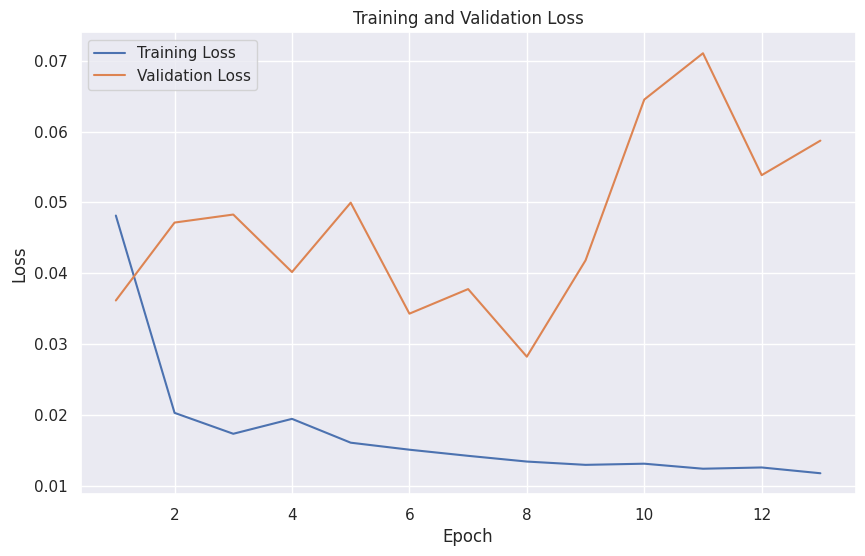

In [78]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 32.249999999999986, 'Predicted Labels')

Text(66.25, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix')

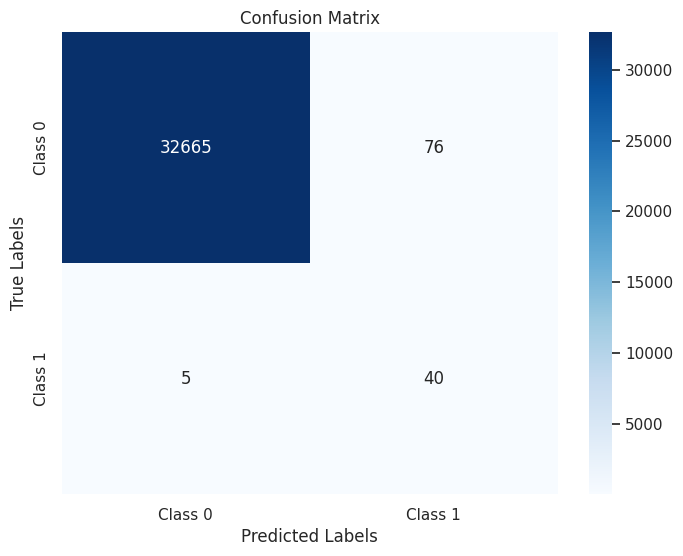

In [79]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()